# Statistical Analysis & Visualization for GPT Condition

In [1]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import plotly.express as px
from statannotations.Annotator import Annotator
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('/work/Include/')
import stat_process

In [2]:
import importlib
importlib.reload(stat_process)

<module 'stat_process' from '/work/Include/stat_process.py'>

In [3]:
df = pd.read_csv("/work/Results/Processed/GPT_Processed_Data.csv")
df

Unnamed: 0           Start Date             End Date Response Type  \
0             2  2022-06-17 19:06:58  2022-06-17 19:30:44    IP Address   
1             3  2022-06-17 19:37:24  2022-06-17 19:55:51    IP Address   
2             4  2022-06-17 19:55:10  2022-06-17 20:10:32    IP Address   
3             5  2022-06-17 19:55:10  2022-06-17 20:10:43    IP Address   
4             7  2022-06-17 20:05:37  2022-06-17 20:20:11    IP Address   
..          ...                  ...                  ...           ...   
155         178  2022-06-24 10:56:11  2022-06-24 11:11:18    IP Address   
156         179  2022-06-24 10:30:27  2022-06-24 11:12:35    IP Address   
157         180  2022-06-24 10:36:02  2022-06-24 11:17:17    IP Address   
158         181  2022-06-24 10:45:31  2022-06-24 11:19:36    IP Address   
159         182  2022-06-24 11:02:20  2022-06-24 11:23:18    IP Address   

    IP Address  Progress  Duration in seconds  Finished        Recorded Date  \
0      *******       100                 1426      True  2022-06-17 19:30:44   
1      *******       100                 1106      True  2022-06-17 19:55:51   
2      *******       100                  921      True  2022-06-17 20:10:32   
3      *******       100                  933      True  2022-06-17 20:10:43   
4      *******       100                  873      True  2022-06-17 20:20:11   
..         ...       ...                  ...       ...                  ...   
155    *******       100                  907      True  2022-06-24 11:11:19   
156    *******       100                 2528      True  2022-06-24 11:12:36   
157    *******       100                 2475      True  2022-06-24 11:17:18   
158    *******       100                 2044      True  2022-06-24 11:19:36   
159    *******       100                 1257      True  2022-06-24 11:23:18   

           Response ID  ...  \
0    R_3HzsyHEWtJTUPi1  ...   
1    R_qJhnyVIDIs4CJYR  ...   
2    R_2fBsUpW2LcXQ7SP  ...   
3    R_2V9McykguniYrKX  ...   
4    R_2dtnelhjtaccq7c  ...   
..                 ...  ...   
155  R_3exJwREuGMBJO1I  ...   
156  R_3NRgOI3IRZLpd16  ...   
157  R_2XoinwbLDyODujA  ...   
158  R_2WGOcIB0JMp3Fe4  ...   
159  R_1MXoFHQ6Ug9QnuH  ...   

                                    convo_conversation       convo_group_id  \
0     >AI: I am Melu, a mental health companion. I ...        Caring Motive   
1     >AI: I am Melu, a mental health companion. I ...            No Motive   
2     >AI: I am Melu, a mental health companion. I ...  Manipulative Motive   
3     >AI: I am Melu, a mental health companion. I ...  Manipulative Motive   
4     >AI: I am Melu, a mental health companion. I ...        Caring Motive   
..                                                 ...                  ...   
155   >AI: I am Melu, a mental health companion. I ...            No Motive   
156   >AI: I am Melu, a mental health companion. I ...            No Motive   
157   >AI: I am Melu, a mental health companion. I ...        Caring Motive   
158   >AI: I am Melu, a mental health companion. I ...        Caring Motive   
159   >AI: I am Melu, a mental health companion. I ...  Manipulative Motive   

    convo_AI_turns convo_human_turns convo_total_turns Perceived Motives  \
0               37                36                73     Caring Motive   
1               27                26                53     Caring Motive   
2               20                19                39     Caring Motive   
3               11                10                21     Caring Motive   
4               17                16                33     Caring Motive   
..             ...               ...               ...               ...   
155             12                11                23         No Motive   
156             35                34                69         No Motive   
157             72                71               143     Caring Motive   
158              4                 3                 7     Ca

In [4]:
# get list of questions to vizualize
start = df.columns.get_loc("Agent: You would recommend this agent for your friend")
end = start + 13
tli_s = df.columns.get_loc("Mental Demand: How mentally demanding was the task?")
tli_e = tli_s + 6
utaut = [df.columns.get_loc("UTAUT Performance"),
         df.columns.get_loc("UTAUT Effort"),
         df.columns.get_loc("UTAUT Hedonic")]
other = [df.columns.get_loc("convo_total_turns")]
vizlist_tli = list(range(tli_s,tli_e))
vizlist = list(range(start,end)) + vizlist_tli + utaut + other

vizlist_lik = list(range(start,end)) + utaut
vizlist_other = list(range(tli_s,tli_e)) + other
vizlist

[39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 63,
 64,
 65,
 66,
 67,
 68,
 92,
 93,
 94,
 90]

In [5]:
conditions_list = ["No Motive", "Manipulative Motive", "Caring Motive"]
ivar = "assigned_group"
my_pal = {"No Motive": "#ababab", "Manipulative Motive": "#d16969", "Caring Motive":"#87c771"}

[StatTest] Minimal Sample Size was met. Check if sample sizes are roughly equal.
---------------------------------------------
Performing Equal Variances Test...
Performing Levene Test...
homogeneity test: LeveneResult(statistic=5.510821438764715, pvalue=0.004863539061412032)
The populations do NOT have equal variances.
[StatTest] Assumption of Equal Variances was violated. Run ANOVA with Welch Statistic.
F_onewayResult(statistic=4.33612721629483, pvalue=0.015567166863270372)
ANOVA with Welch Statistic: SIGNIFICANCE. At least one of the means of the groups is different.
[StatTest] ANOVA with Welch Statistic found significance. Run Tukey post-hoc test.
---------------------------------------------
Performing Tukey Post-Hoc Test...
             Multiple Comparison of Means - Tukey HSD, FWER=0.05              
       group1              group2       meandiff p-adj   lower   upper  reject
------------------------------------------------------------------------------
      Caring Motive Man

(0.015567166863270372, 'ANOVA with Welch, Tukey posthoc')

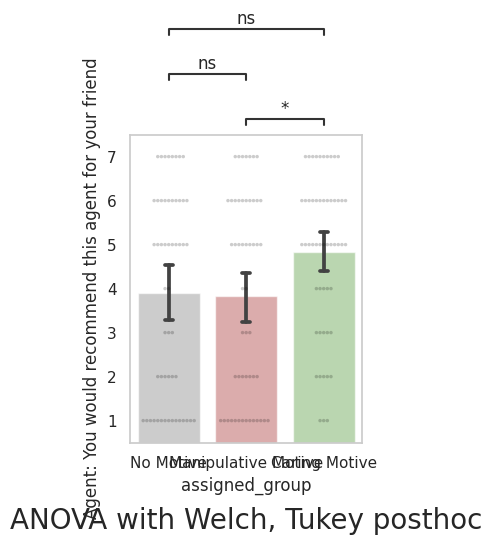

In [6]:
dvar = df.columns[vizlist_lik[0]]
stat_process.StatTest(df, ivar, dvar, conditions_list, viz=True, pal=my_pal, ylims=(0.5,7.5))

**********************************
Agent: You would recommend this agent for your friend
[StatTest] Minimal Sample Size was met. Check if sample sizes are roughly equal.
---------------------------------------------
Performing Equal Variances Test...
Performing Levene Test...
homogeneity test: LeveneResult(statistic=5.510821438764715, pvalue=0.004863539061412032)
The populations do NOT have equal variances.
[StatTest] Assumption of Equal Variances was violated. Run ANOVA with Welch Statistic.
F_onewayResult(statistic=4.33612721629483, pvalue=0.015567166863270372)
ANOVA with Welch Statistic: SIGNIFICANCE. At least one of the means of the groups is different.
[StatTest] ANOVA with Welch Statistic found significance. Run Tukey post-hoc test.
---------------------------------------------
Performing Tukey Post-Hoc Test...
             Multiple Comparison of Means - Tukey HSD, FWER=0.05              
       group1              group2       meandiff p-adj   lower   upper  reject
-------------

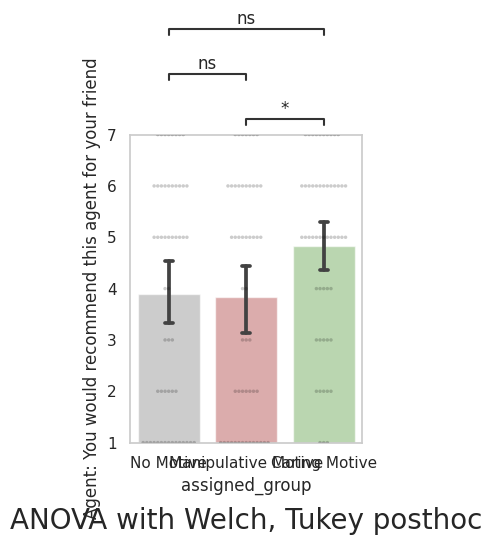

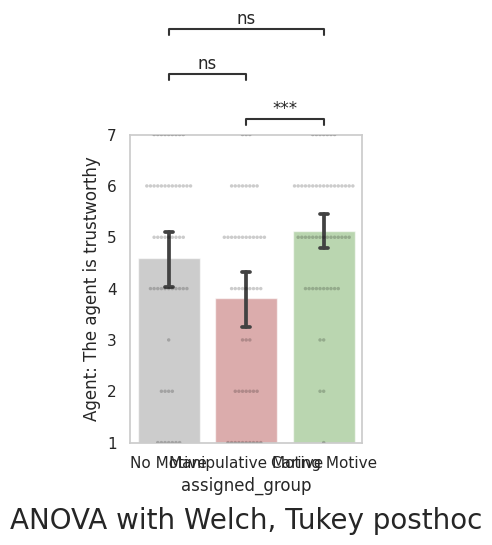

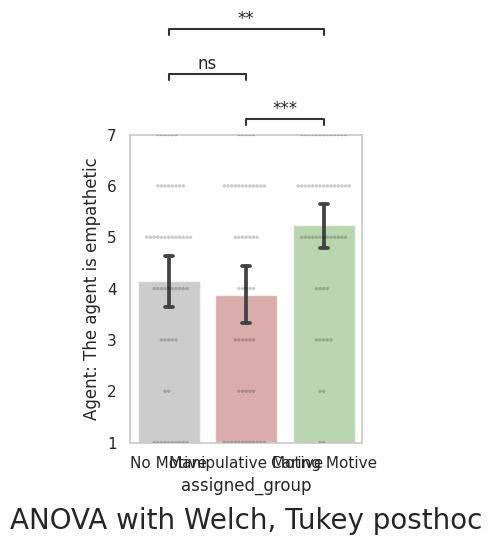

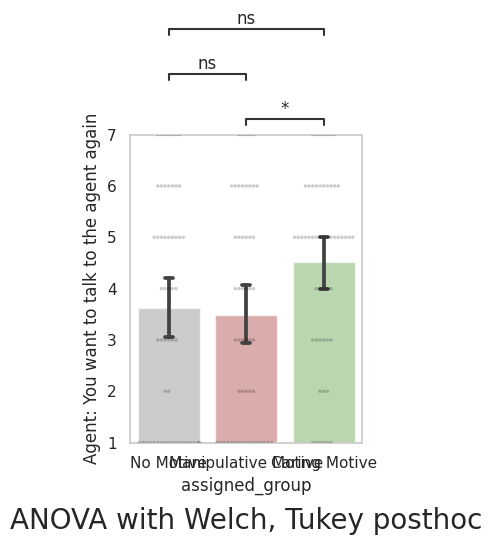

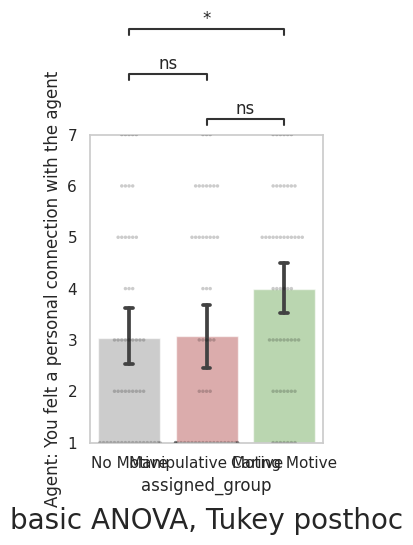

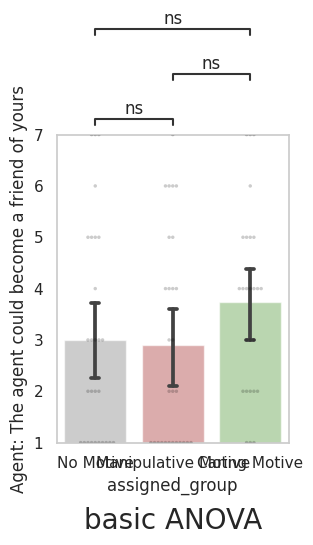

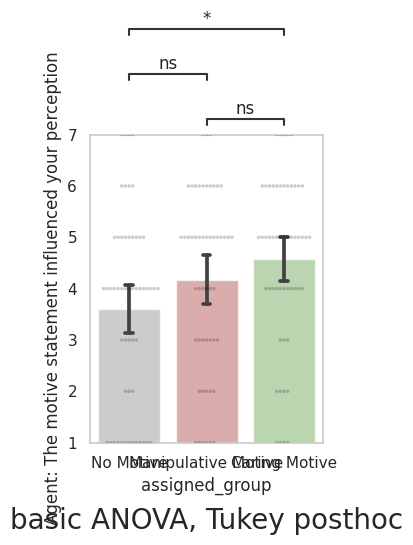

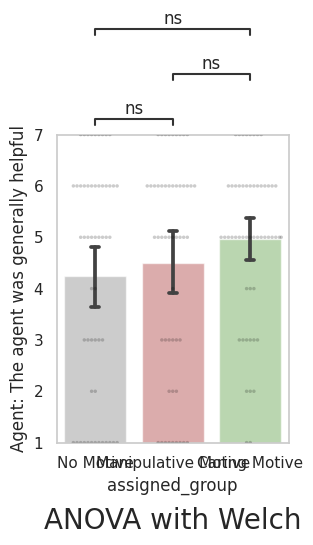

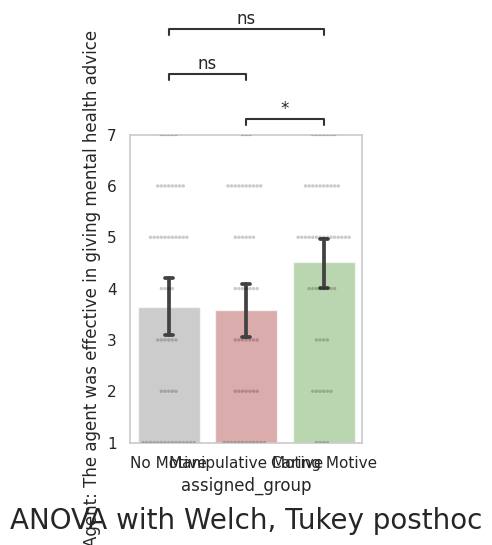

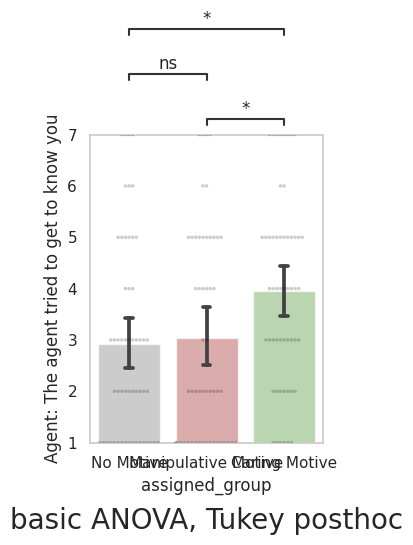

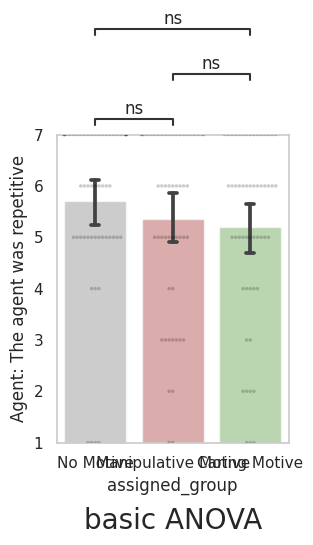

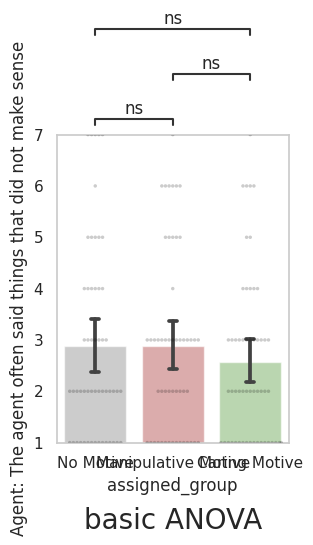

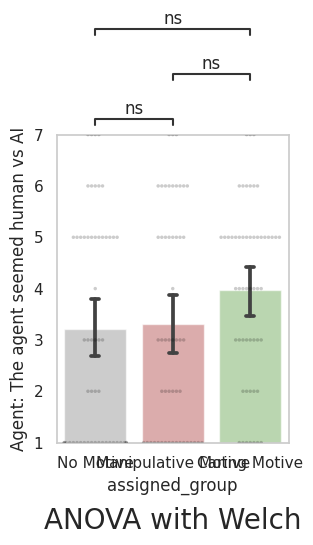

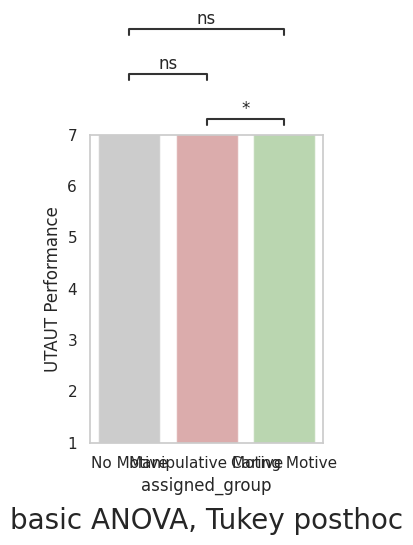

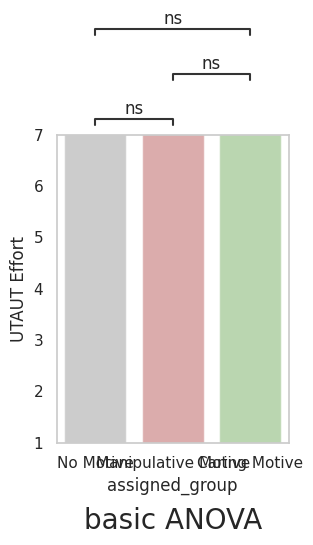

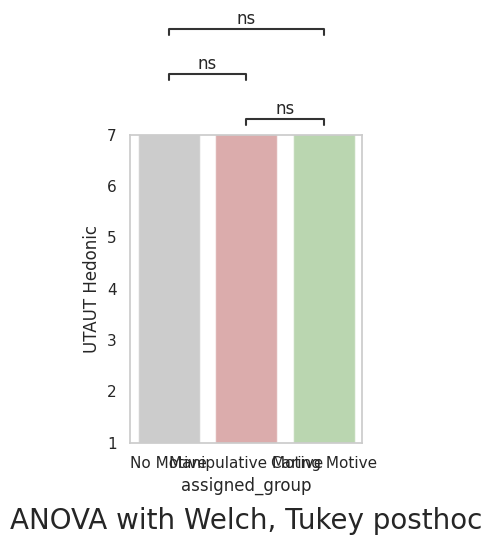

In [7]:
for i in vizlist_lik:
    dvar = df.columns[i]
    print("**********************************")
    print(dvar)
    stat_process.StatTest(df, ivar, dvar, conditions_list, viz=True, pal=my_pal, ylims=(1,7))

**********************************
Agent: You would recommend this agent for your friend
[StatTest] Minimal Sample Size was met. Check if sample sizes are roughly equal.
---------------------------------------------
Performing Equal Variances Test...
Performing Levene Test...
homogeneity test: LeveneResult(statistic=5.510821438764715, pvalue=0.004863539061412032)
The populations do NOT have equal variances.
[StatTest] Assumption of Equal Variances was violated. Run ANOVA with Welch Statistic.
F_onewayResult(statistic=4.33612721629483, pvalue=0.015567166863270372)
ANOVA with Welch Statistic: SIGNIFICANCE. At least one of the means of the groups is different.
[StatTest] ANOVA with Welch Statistic found significance. Run Tukey post-hoc test.
---------------------------------------------
Performing Tukey Post-Hoc Test...
             Multiple Comparison of Means - Tukey HSD, FWER=0.05              
       group1              group2       meandiff p-adj   lower   upper  reject
-------------

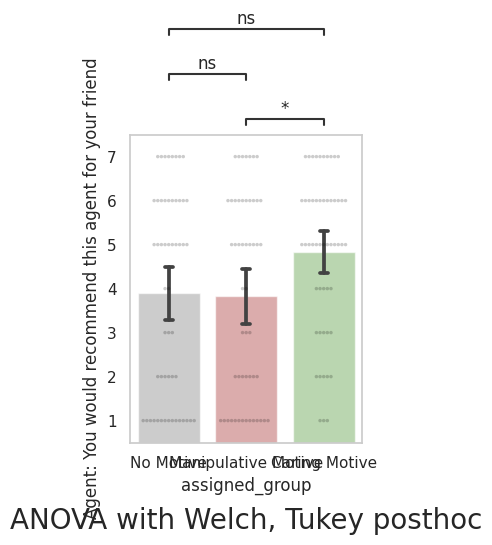

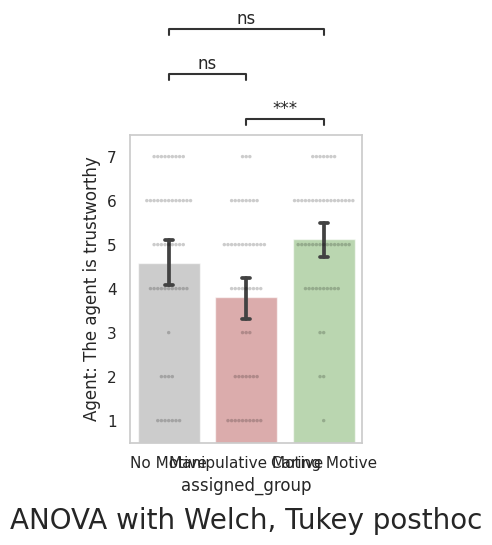

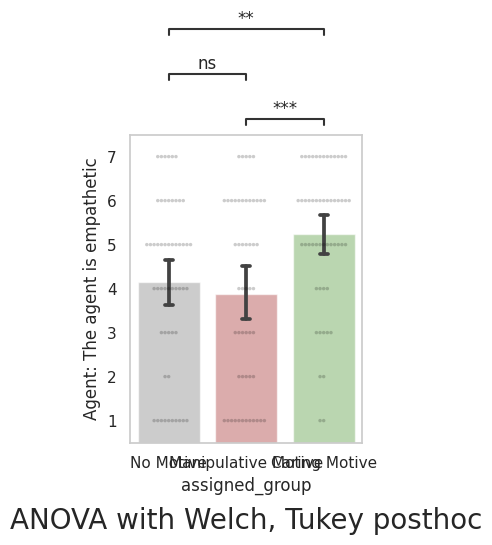

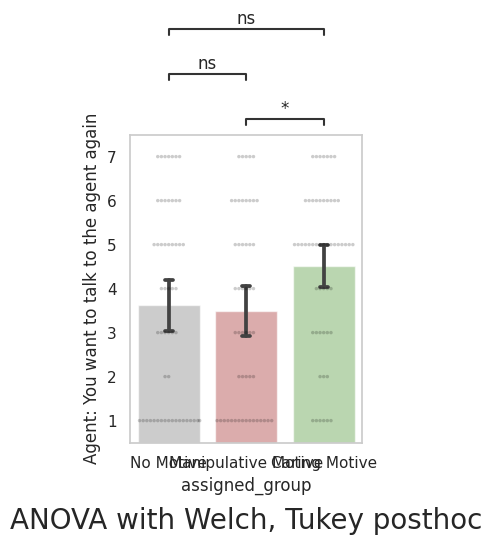

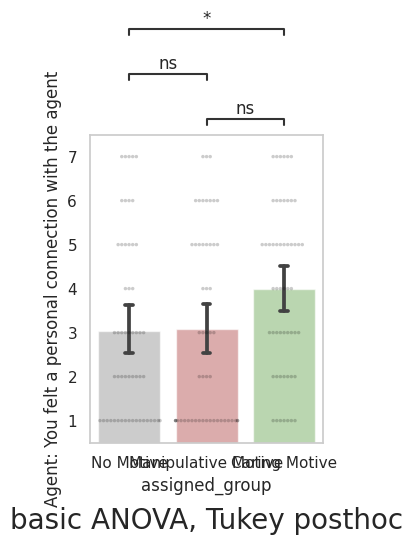

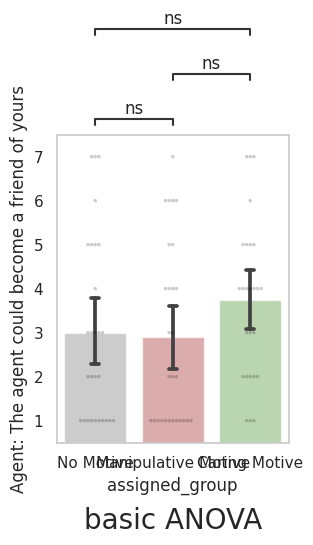

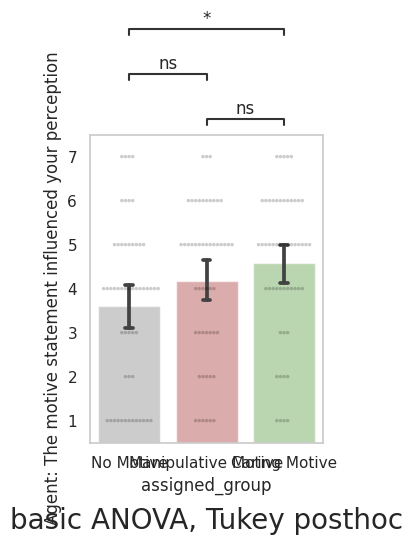

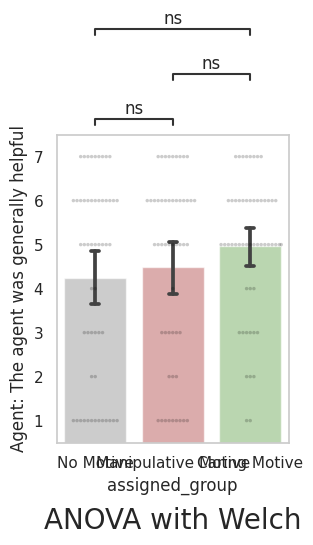

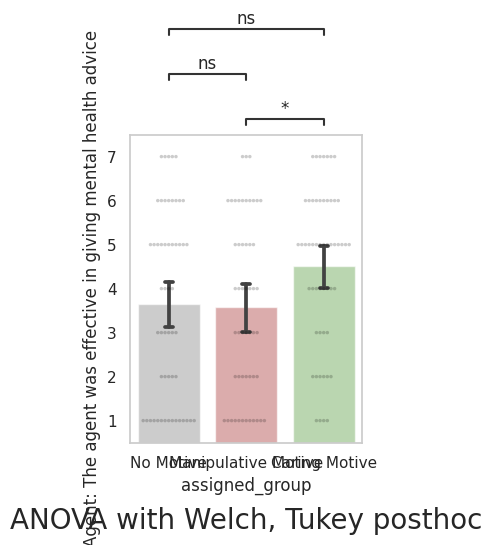

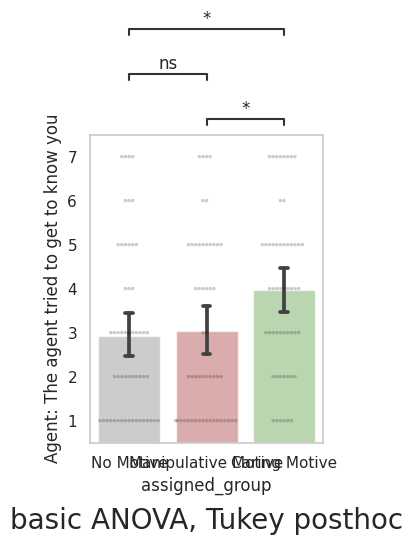

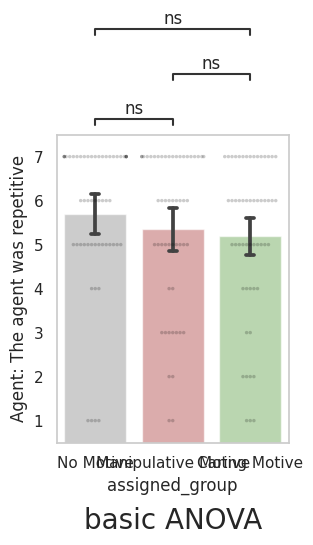

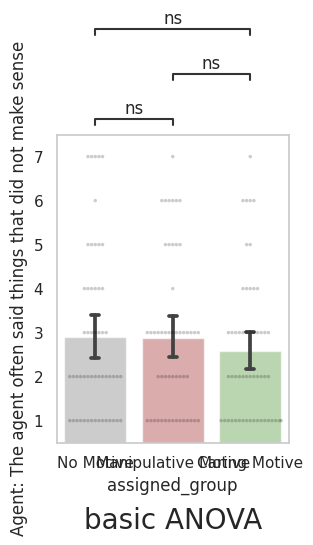

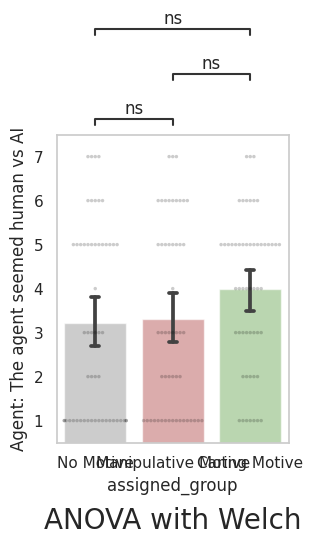

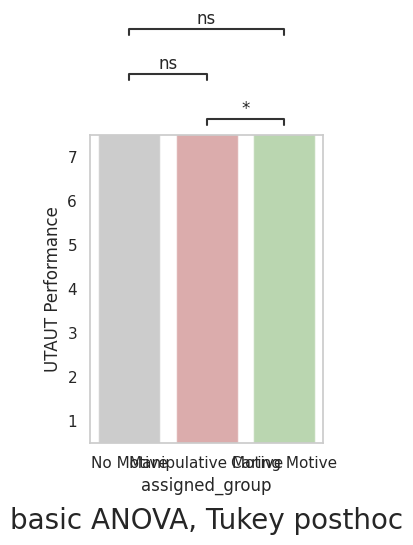

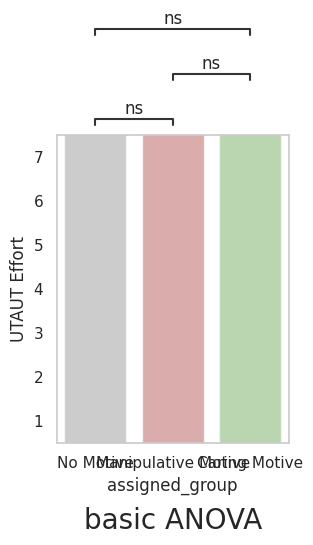

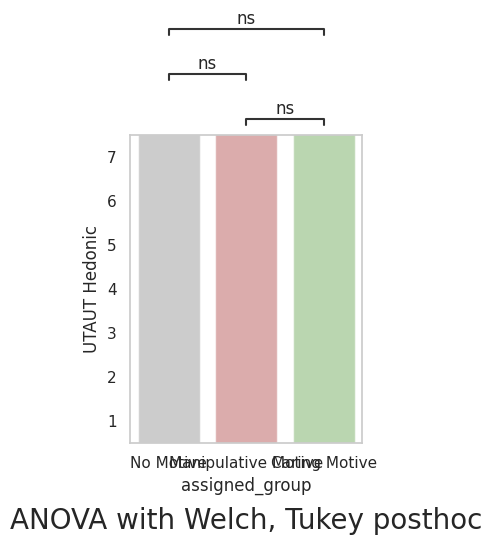

In [8]:
for i in vizlist_lik:
    dvar = df.columns[i]
    print("**********************************")
    print(dvar)
    stat_process.StatTest(df, ivar, dvar, conditions_list, viz=True, pal=my_pal, ylims=(0.5,7.5))

**********************************
Agent: You would recommend this agent for your friend
[StatTest] Minimal Sample Size was met. Check if sample sizes are roughly equal.
---------------------------------------------
Performing Equal Variances Test...
Performing Levene Test...
homogeneity test: LeveneResult(statistic=5.510821438764715, pvalue=0.004863539061412032)
The populations do NOT have equal variances.
[StatTest] Assumption of Equal Variances was violated. Run ANOVA with Welch Statistic.
F_onewayResult(statistic=4.33612721629483, pvalue=0.015567166863270372)
ANOVA with Welch Statistic: SIGNIFICANCE. At least one of the means of the groups is different.
[StatTest] ANOVA with Welch Statistic found significance. Run Tukey post-hoc test.
---------------------------------------------
Performing Tukey Post-Hoc Test...
             Multiple Comparison of Means - Tukey HSD, FWER=0.05              
       group1              group2       meandiff p-adj   lower   upper  reject
-------------

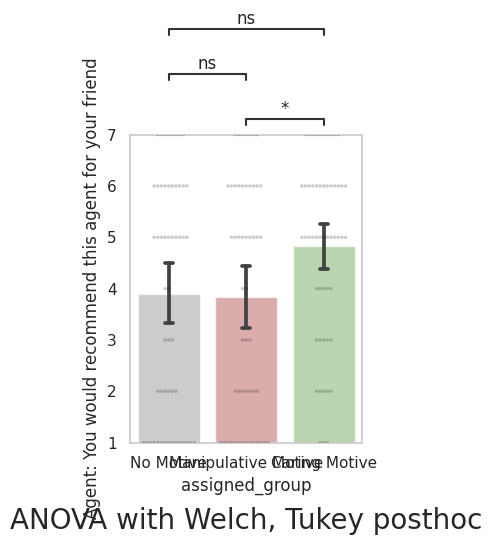

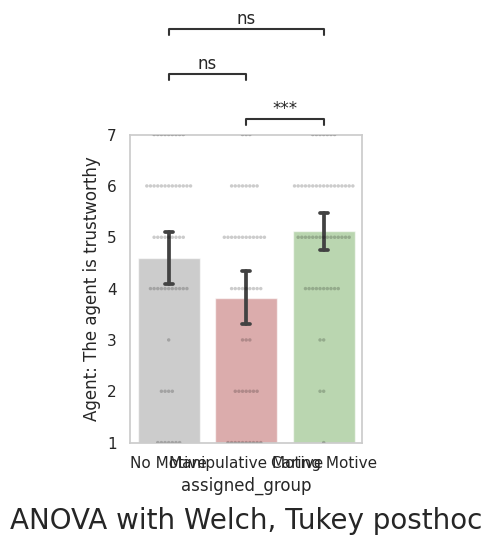

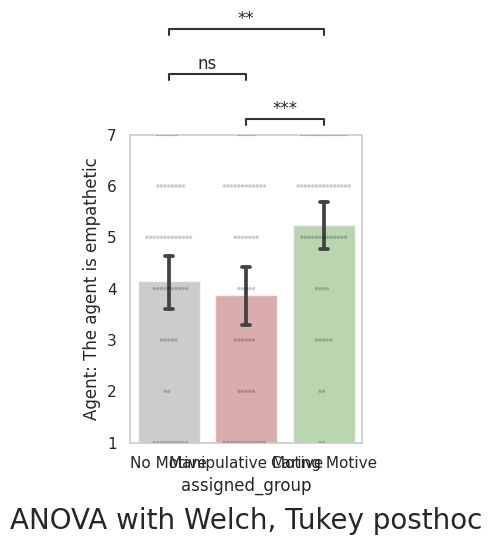

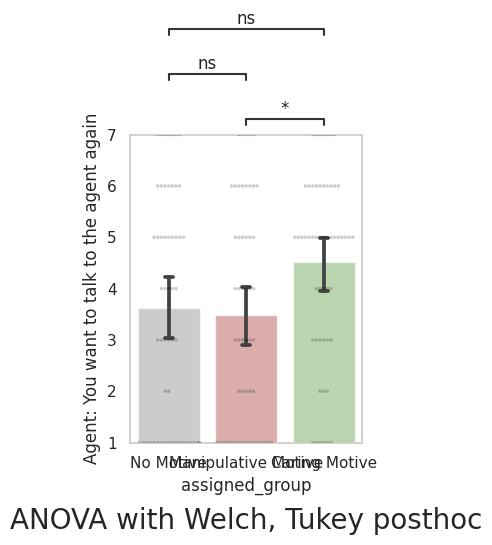

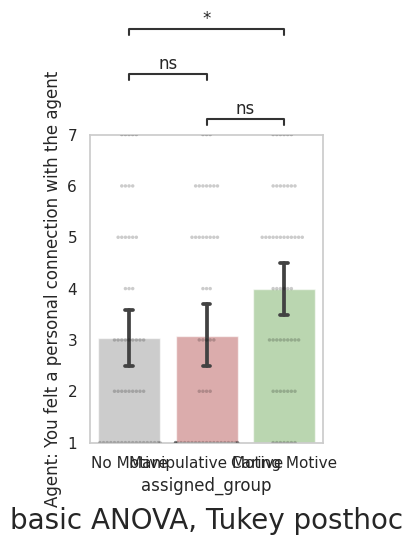

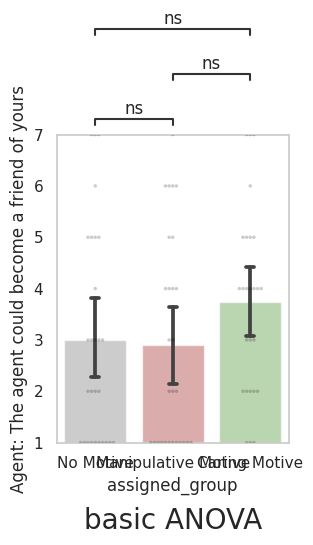

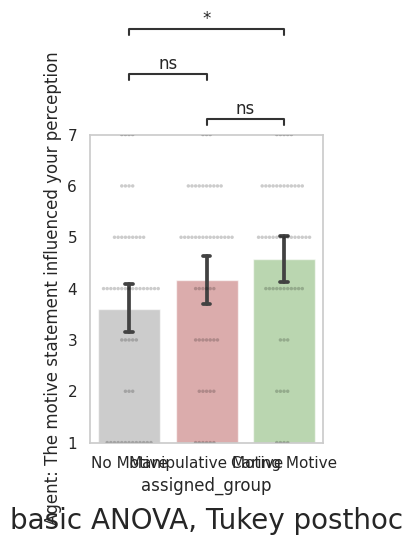

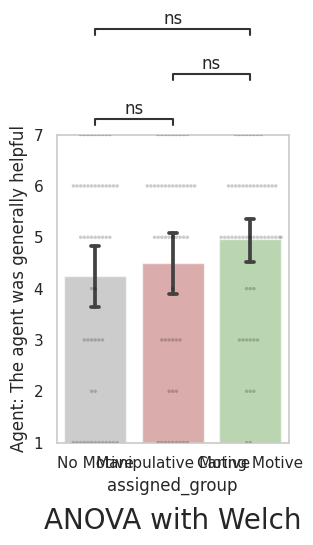

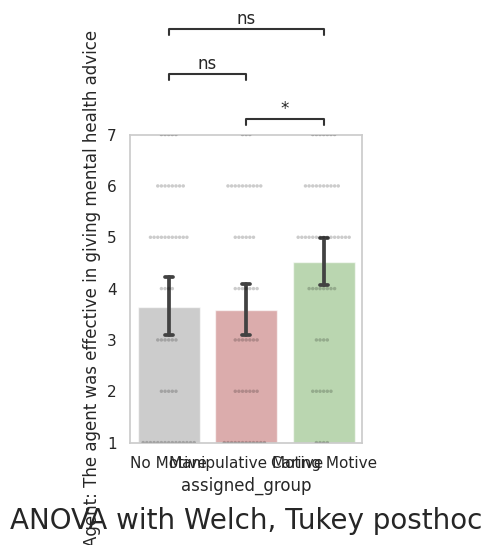

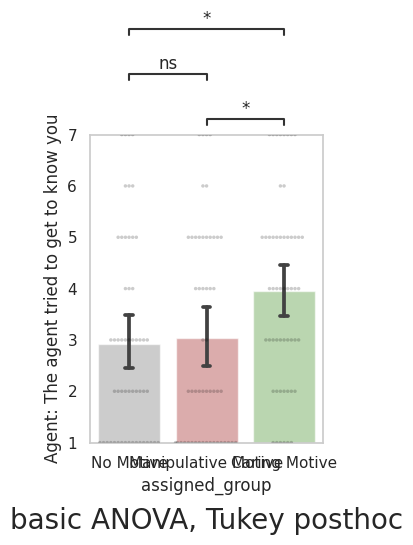

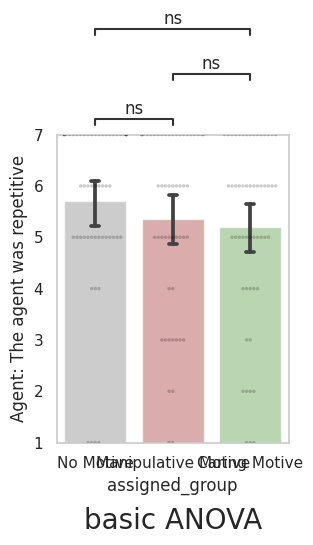

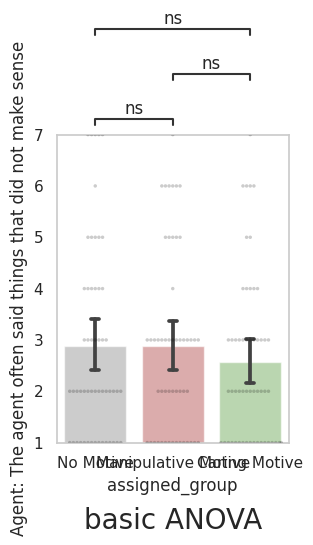

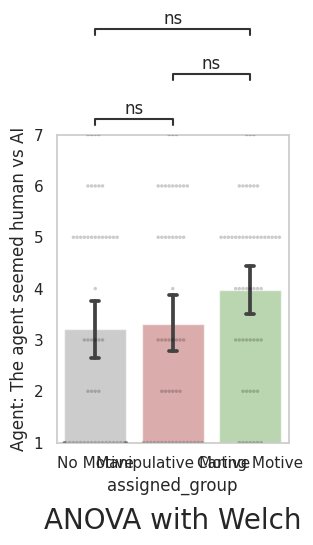

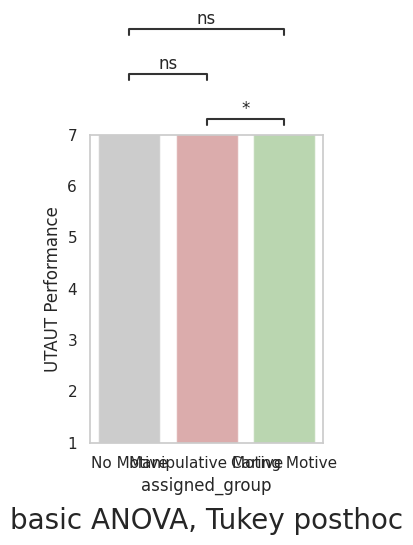

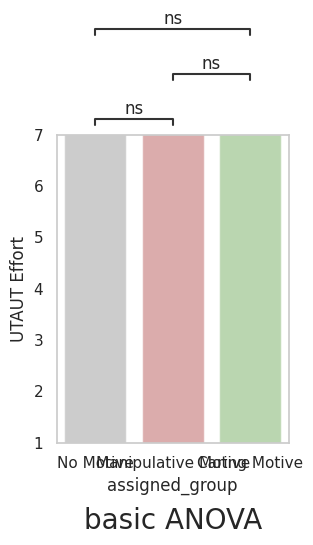

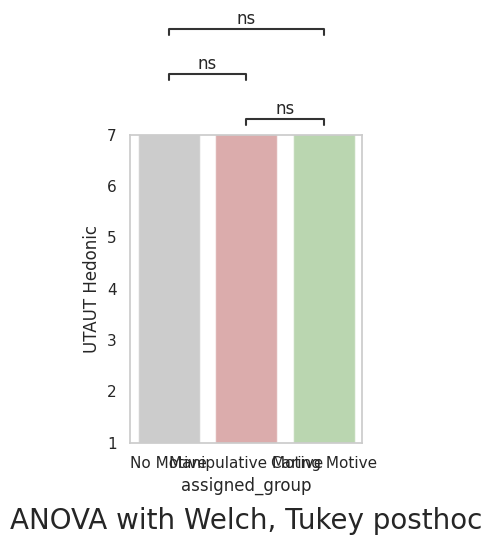

In [9]:
# ELIZA - Assigned

for i in vizlist_lik:
    dvar = df.columns[i]
    print("**********************************")
    print(dvar)
    stat_process.StatTest(df, ivar, dvar, conditions_list, viz=True, pal=my_pal, ylims=(1,7))

Agent: You would recommend this agent for your friend
[StatTest] Minimal Sample Size was met. Check if sample sizes are roughly equal.
---------------------------------------------
Performing Equal Variances Test...
Performing Levene Test...
homogeneity test: LeveneResult(statistic=5.510821438764715, pvalue=0.004863539061412032)
The populations do NOT have equal variances.
[StatTest] Assumption of Equal Variances was violated. Run ANOVA with Welch Statistic.
F_onewayResult(statistic=4.33612721629483, pvalue=0.015567166863270372)
ANOVA with Welch Statistic: SIGNIFICANCE. At least one of the means of the groups is different.
[StatTest] ANOVA with Welch Statistic found significance. Run Tukey post-hoc test.
---------------------------------------------
Performing Tukey Post-Hoc Test...
             Multiple Comparison of Means - Tukey HSD, FWER=0.05              
       group1              group2       meandiff p-adj   lower   upper  reject
------------------------------------------------

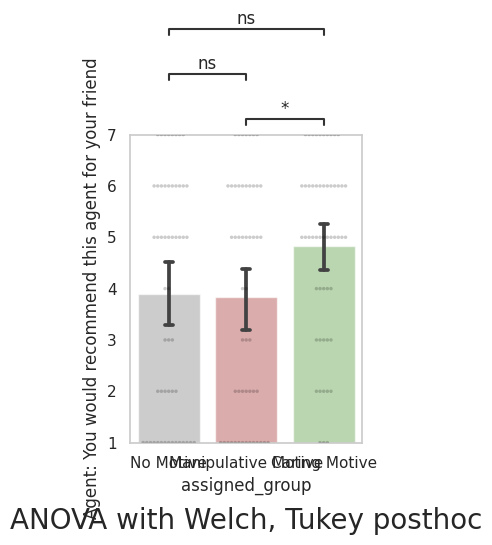

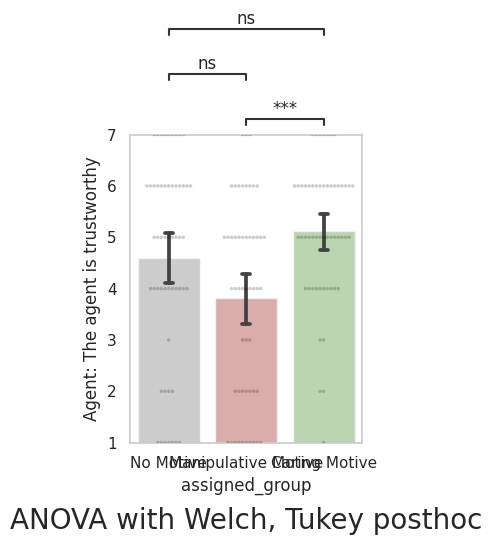

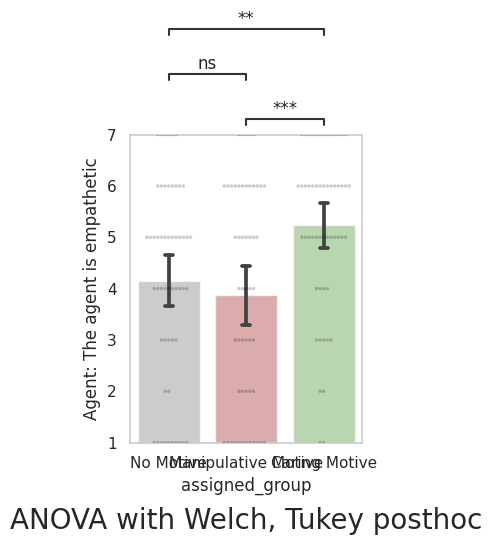

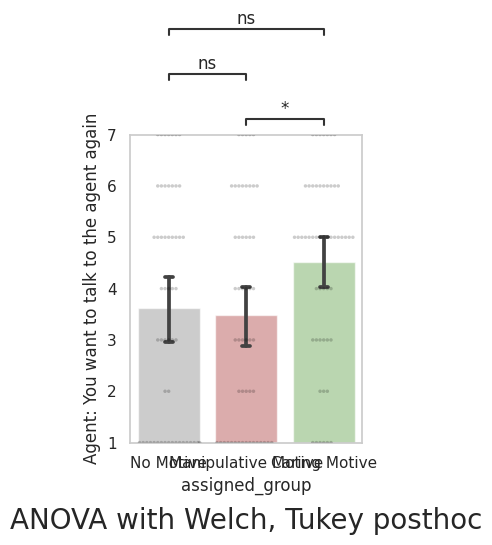

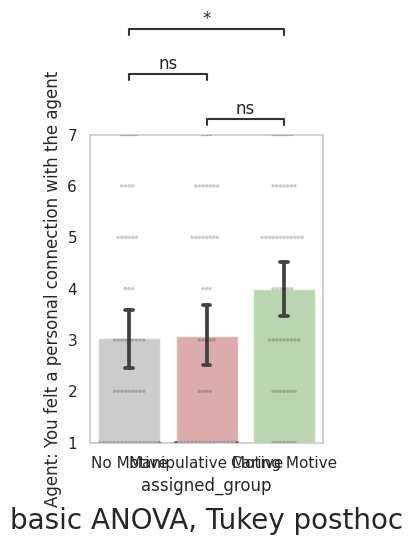

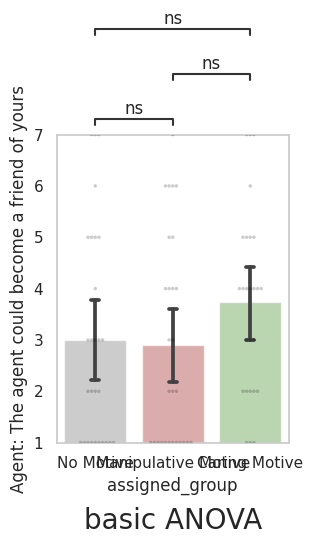

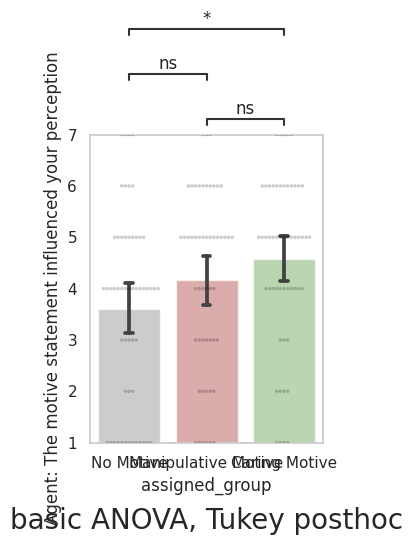

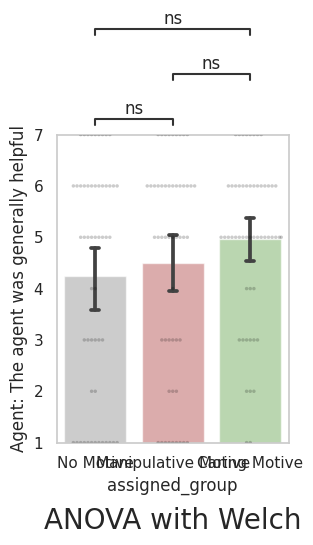

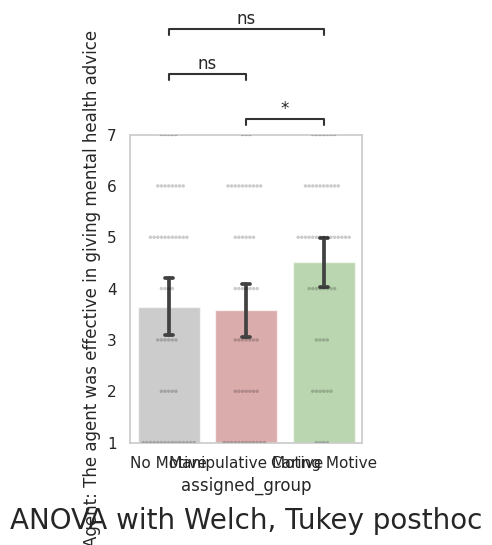

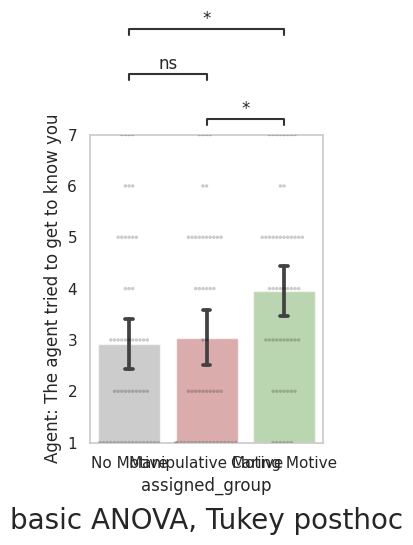

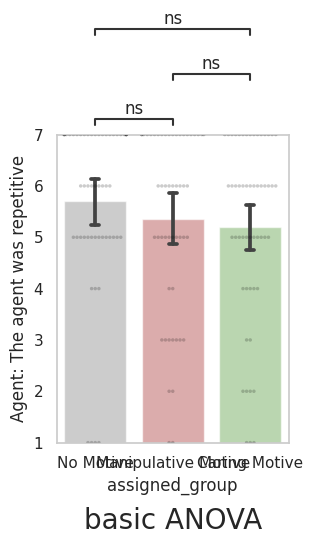

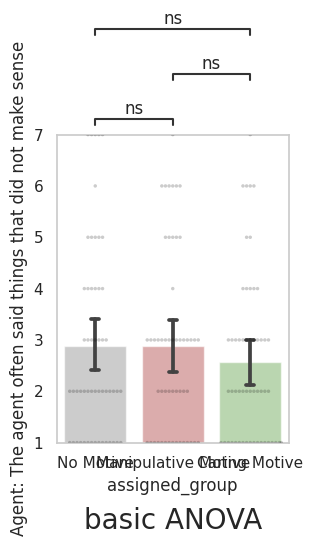

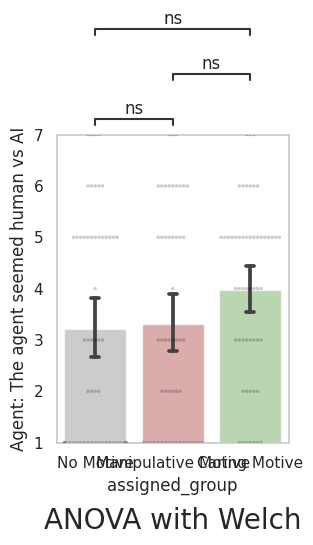

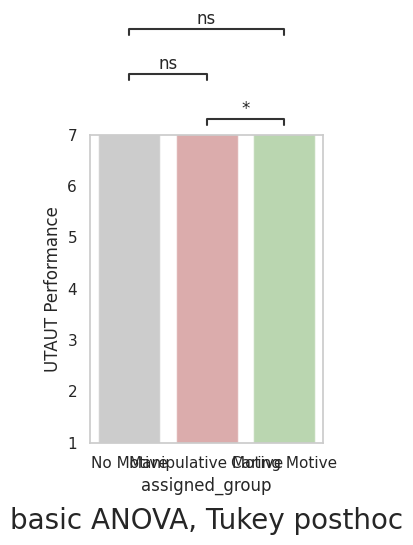

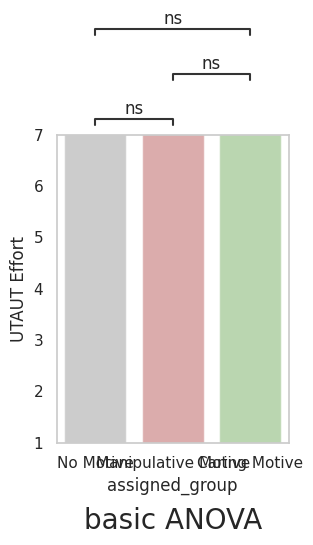

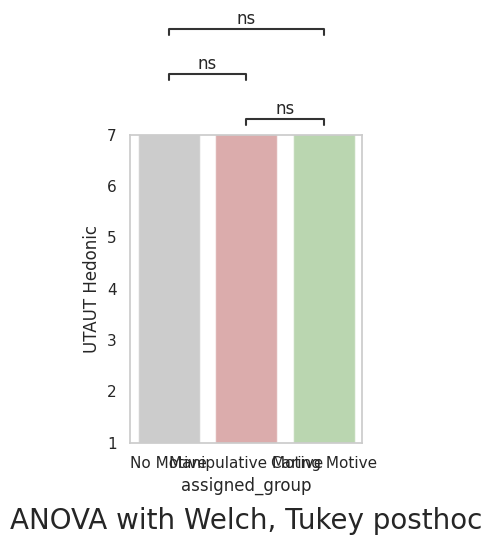

In [10]:
for i in vizlist_lik:
    dvar = df.columns[i]
    print(dvar)
    stat_process.StatTest(df, ivar, dvar, conditions_list, viz=True, pal=my_pal, ylims=(1,7))

[StatTest] Minimal Sample Size was not met. Proceed to check Normality Assumption.
---------------------------------------------
Performing Shapiro-Wilk normality test...
alpha_value: 0.05
ShapiroResult(statistic=0.8495832681655884, pvalue=1.8589397541290964e-06)
Series No Motive: is NOT normal. W:0.8495832681655884, Pvalue: 1.8589397541290964e-06
ShapiroResult(statistic=0.7251454591751099, pvalue=0.00032385587110184133)
Series Manipulative Motive: is NOT normal. W:0.7251454591751099, Pvalue: 0.00032385587110184133
ShapiroResult(statistic=0.8769992589950562, pvalue=1.8982182155014016e-06)
Series Caring Motive: is NOT normal. W:0.8769992589950562, Pvalue: 1.8982182155014016e-06
Normality Assumption Met? : False
[StatTest]  Normality Assumption was not met. Proceed with Kruskal-Wallis Test
---------------------------------------------
alpha: 0.05
KruskalResult(statistic=22.007063410466486, pvalue=1.6642819343319887e-05)
Significant Result for Kruskal Wallis.
Compute the DUNN post-hoc tes

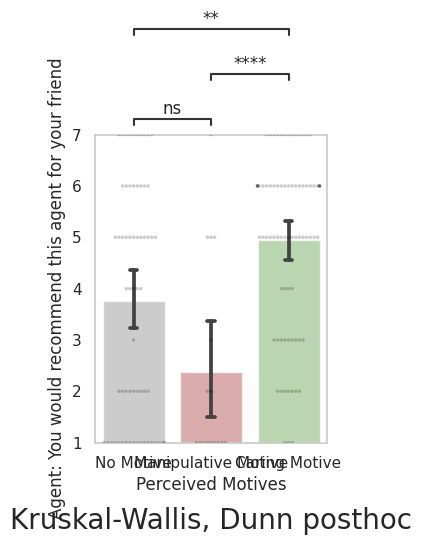

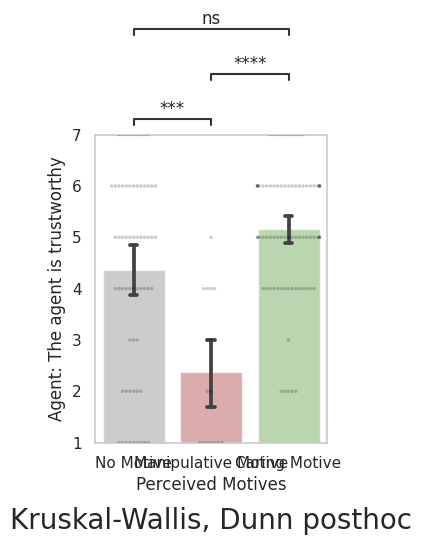

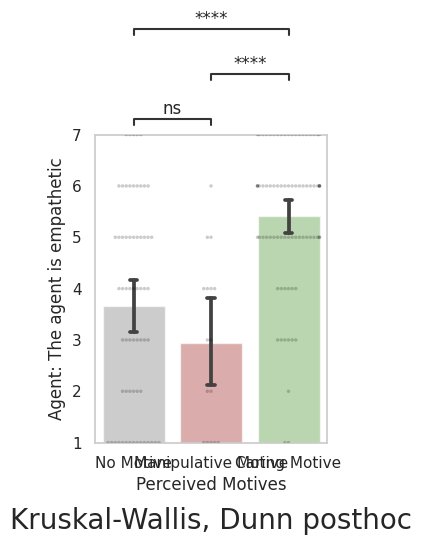

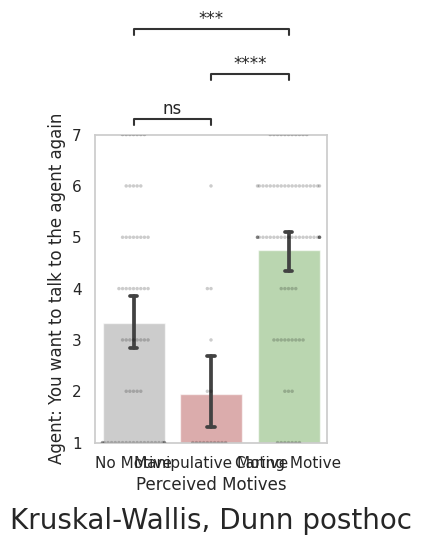

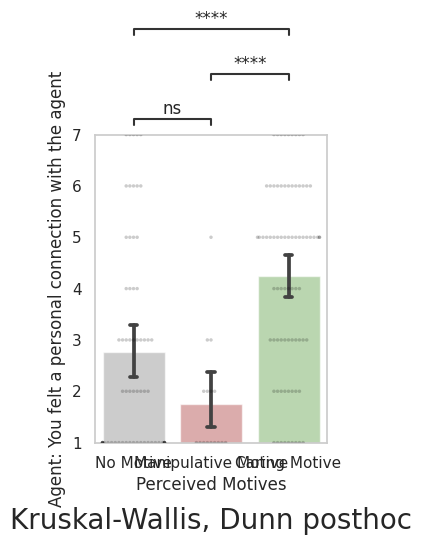

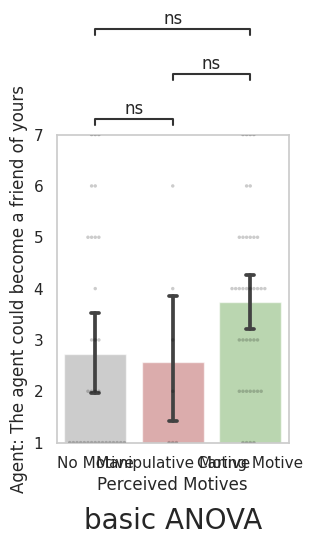

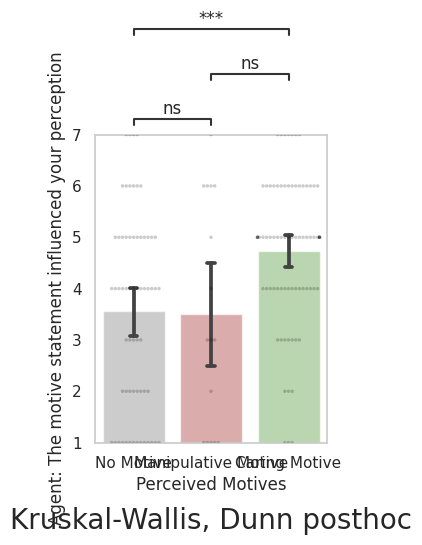

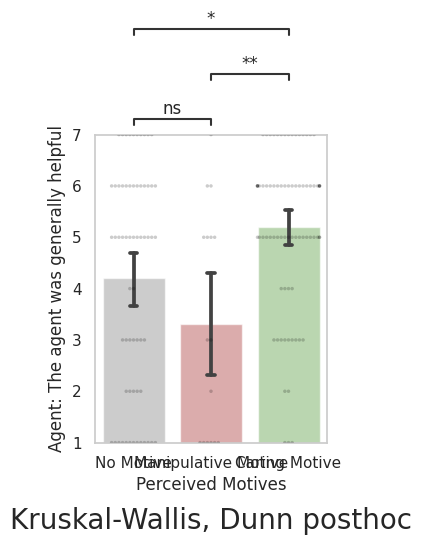

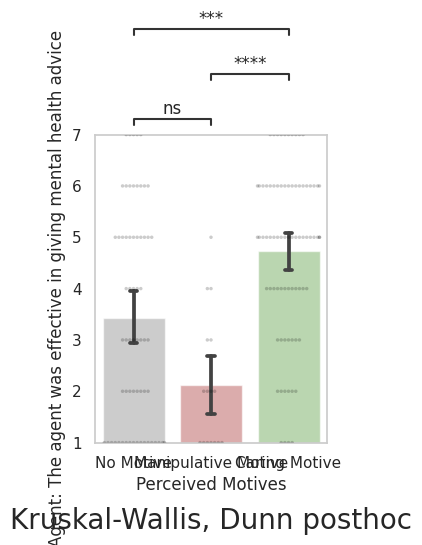

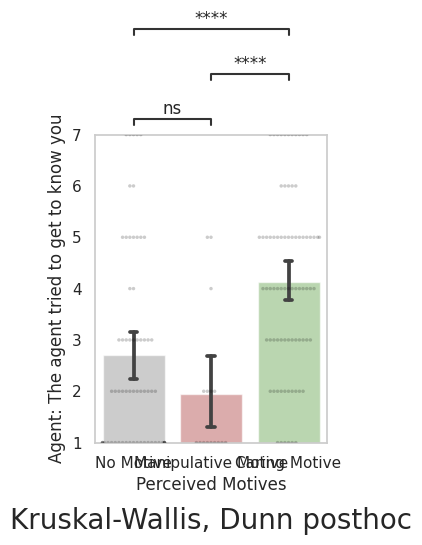

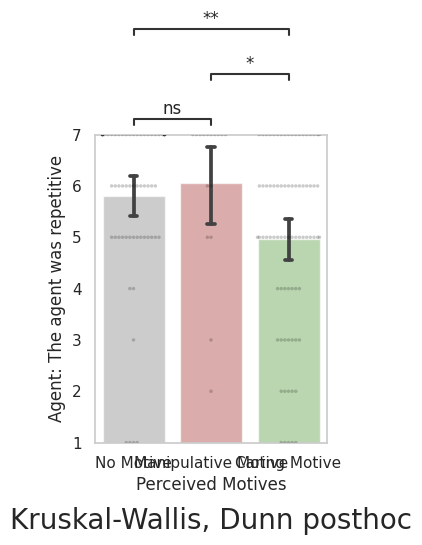

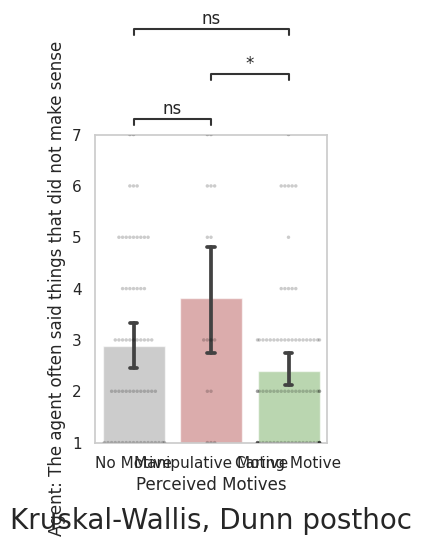

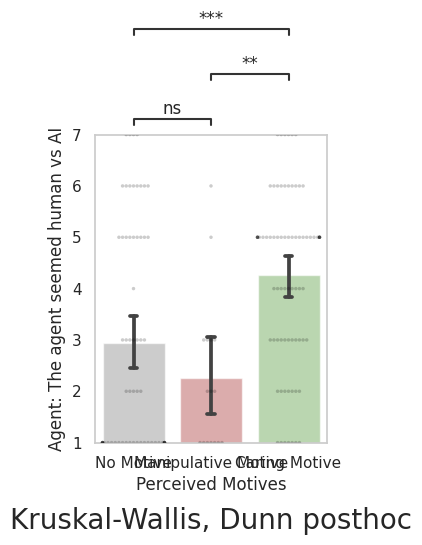

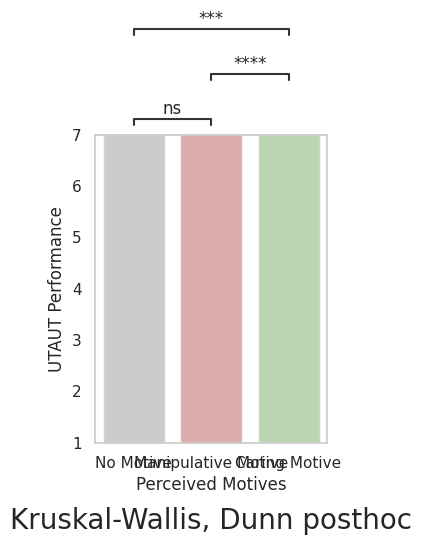

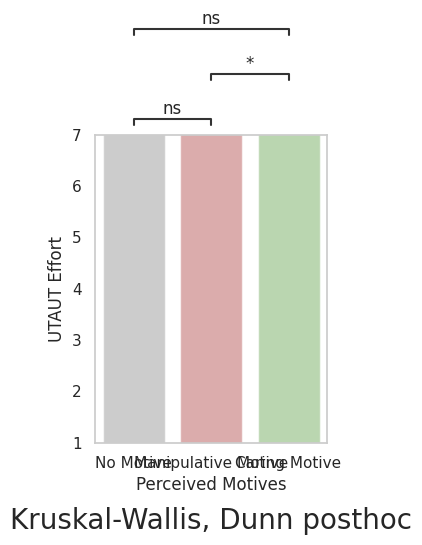

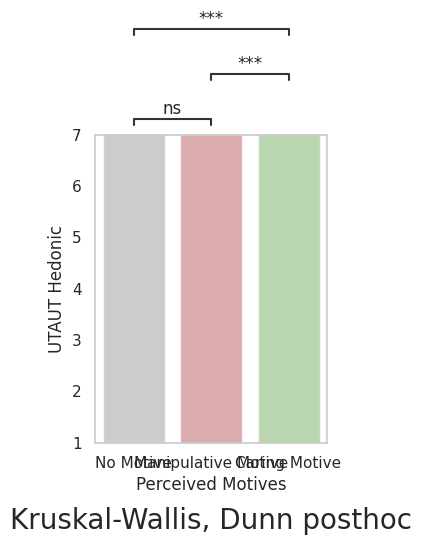

In [11]:
for i in vizlist_lik:
    dvar = df.columns[i]
    stat_process.StatTest(df, "Perceived Motives", dvar, conditions_list, viz=True, pal=my_pal, ylims=(1,7))

[StatTest] Minimal Sample Size was not met. Proceed to check Normality Assumption.
---------------------------------------------
Performing Shapiro-Wilk normality test...
alpha_value: 0.05
ShapiroResult(statistic=0.8495832681655884, pvalue=1.8589397541290964e-06)
Series No Motive: is NOT normal. W:0.8495832681655884, Pvalue: 1.8589397541290964e-06
ShapiroResult(statistic=0.7251454591751099, pvalue=0.00032385587110184133)
Series Manipulative Motive: is NOT normal. W:0.7251454591751099, Pvalue: 0.00032385587110184133
ShapiroResult(statistic=0.8769992589950562, pvalue=1.8982182155014016e-06)
Series Caring Motive: is NOT normal. W:0.8769992589950562, Pvalue: 1.8982182155014016e-06
Normality Assumption Met? : False
[StatTest]  Normality Assumption was not met. Proceed with Kruskal-Wallis Test
---------------------------------------------
alpha: 0.05
KruskalResult(statistic=22.007063410466486, pvalue=1.6642819343319887e-05)
Significant Result for Kruskal Wallis.
Compute the DUNN post-hoc tes

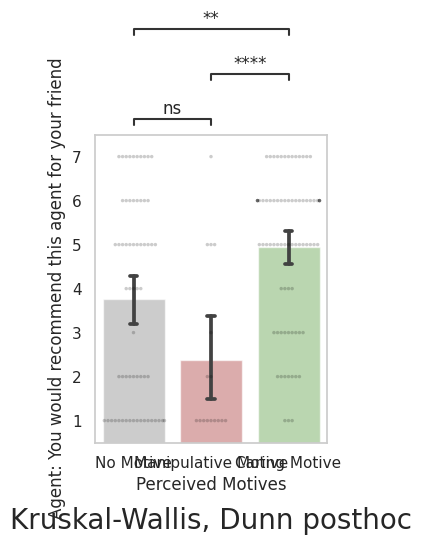

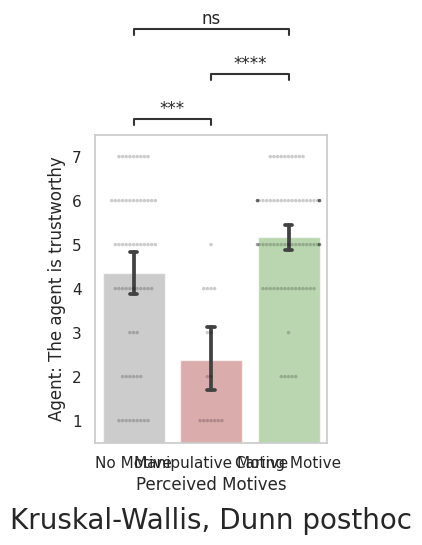

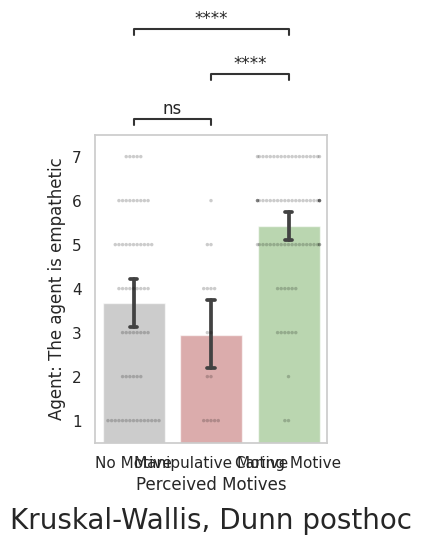

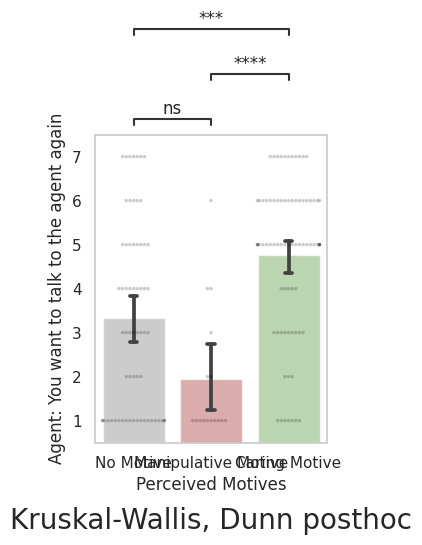

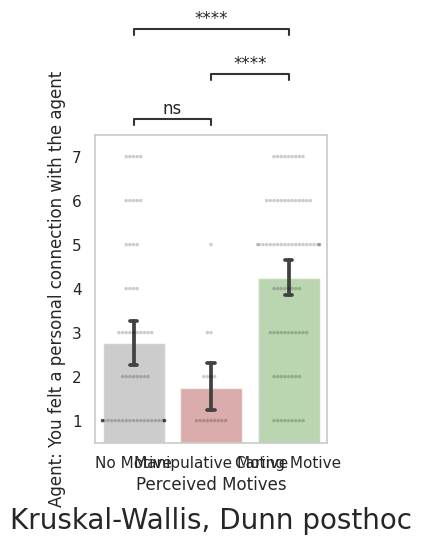

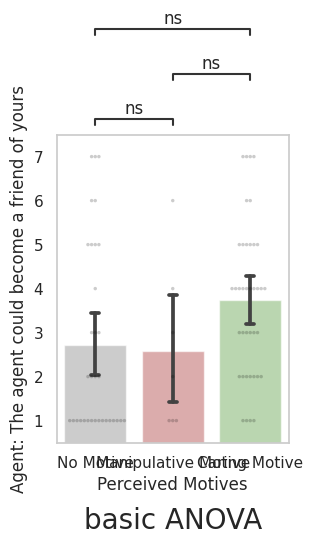

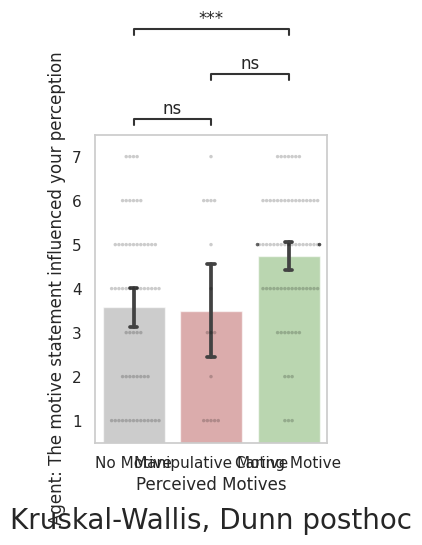

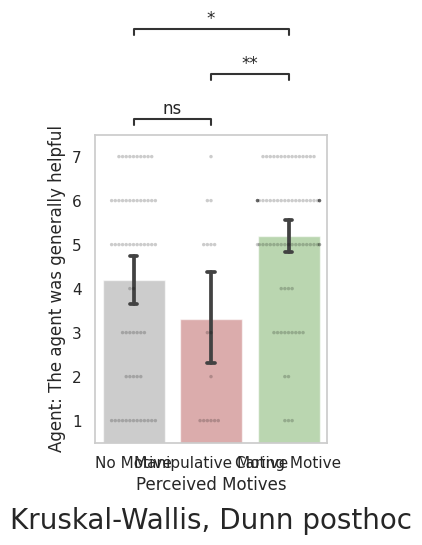

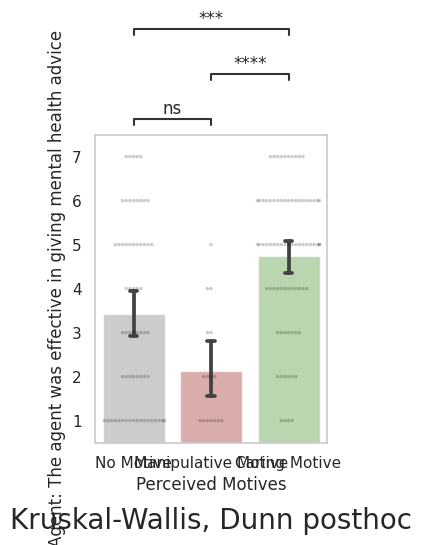

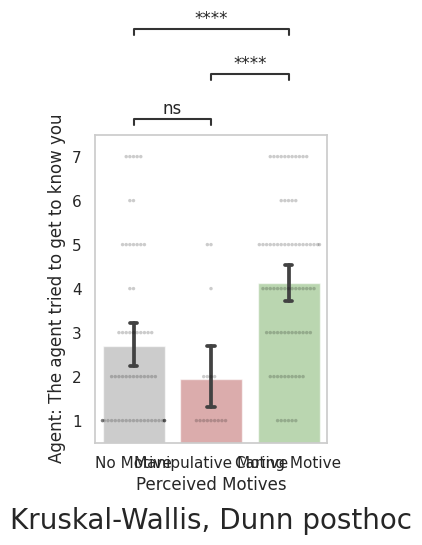

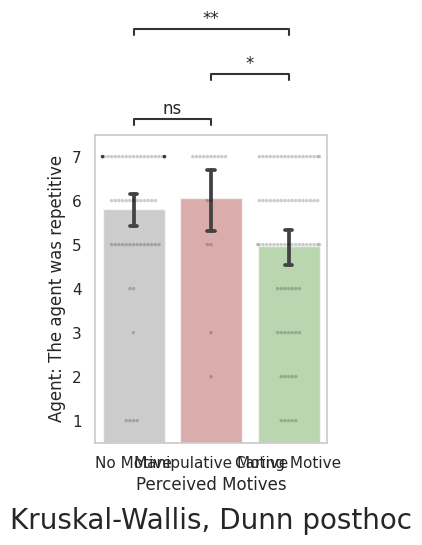

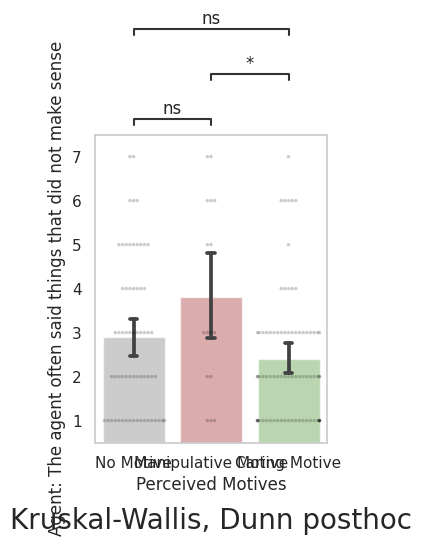

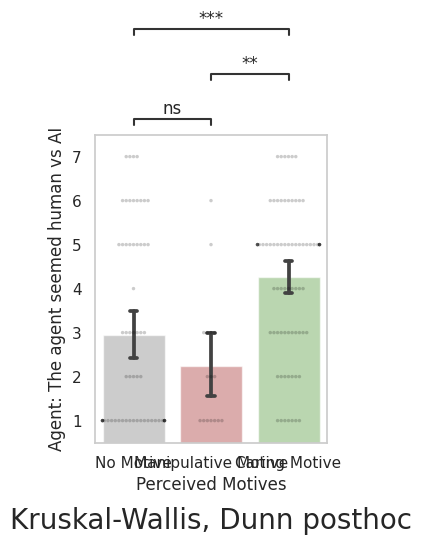

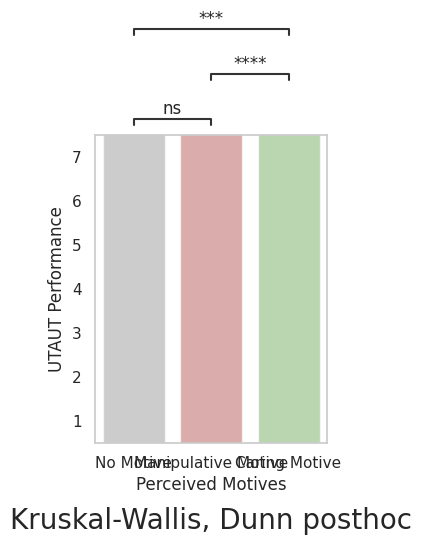

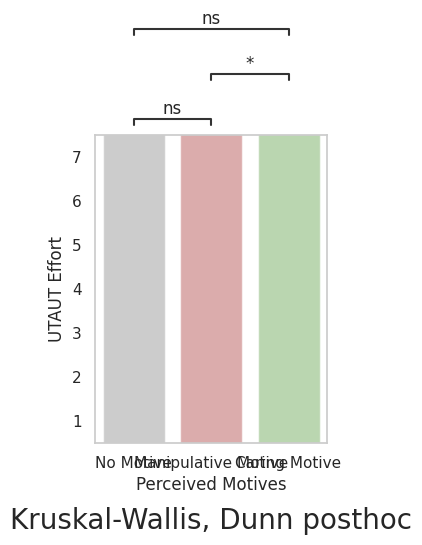

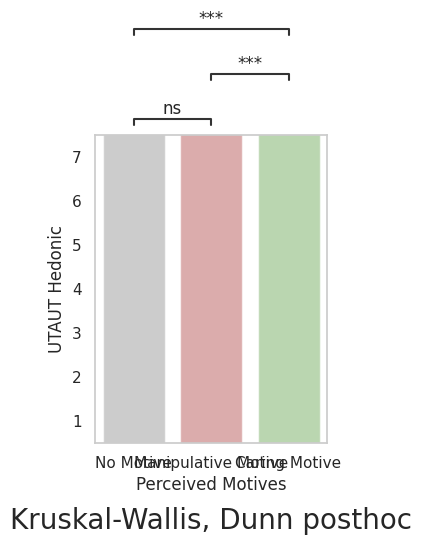

In [12]:
for i in vizlist_lik:
    dvar = df.columns[i]
    stat_process.StatTest(df, "Perceived Motives", dvar, conditions_list, viz=True, pal=my_pal, ylims=(0.5,7.5))

**********************************
Agent: You would recommend this agent for your friend
[StatTest] Minimal Sample Size was not met. Proceed to check Normality Assumption.
---------------------------------------------
Performing Shapiro-Wilk normality test...
alpha_value: 0.05
ShapiroResult(statistic=0.8495832681655884, pvalue=1.8589397541290964e-06)
Series No Motive: is NOT normal. W:0.8495832681655884, Pvalue: 1.8589397541290964e-06
ShapiroResult(statistic=0.7251454591751099, pvalue=0.00032385587110184133)
Series Manipulative Motive: is NOT normal. W:0.7251454591751099, Pvalue: 0.00032385587110184133
ShapiroResult(statistic=0.8769992589950562, pvalue=1.8982182155014016e-06)
Series Caring Motive: is NOT normal. W:0.8769992589950562, Pvalue: 1.8982182155014016e-06
Normality Assumption Met? : False
[StatTest]  Normality Assumption was not met. Proceed with Kruskal-Wallis Test
---------------------------------------------
alpha: 0.05
KruskalResult(statistic=22.007063410466486, pvalue=1.6

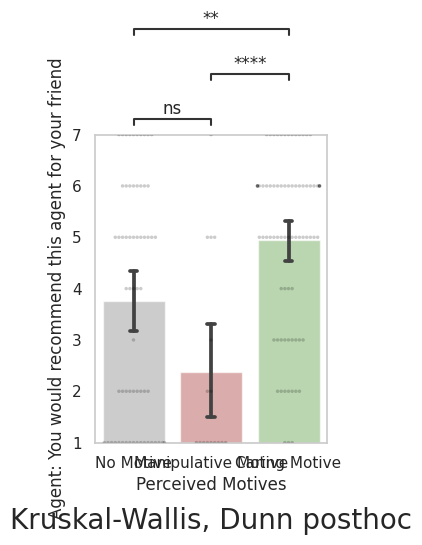

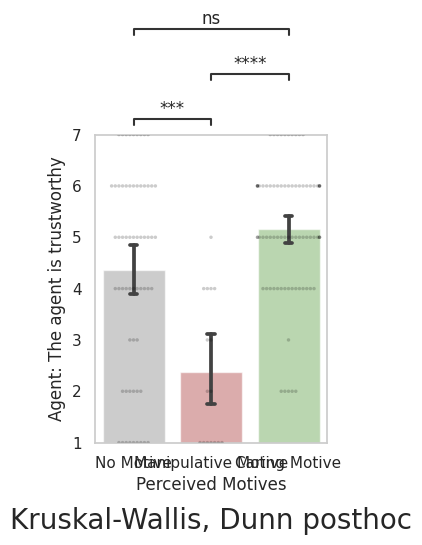

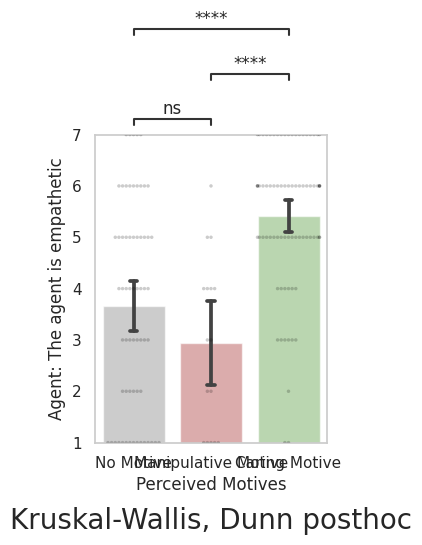

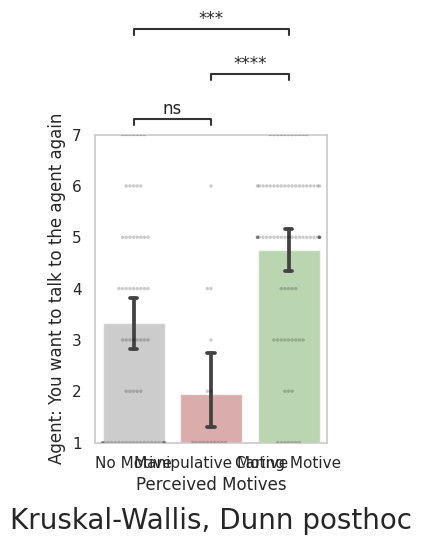

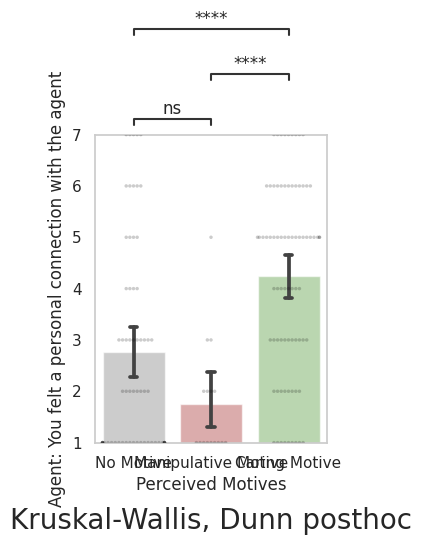

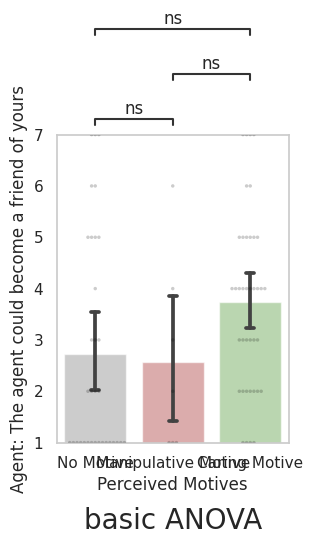

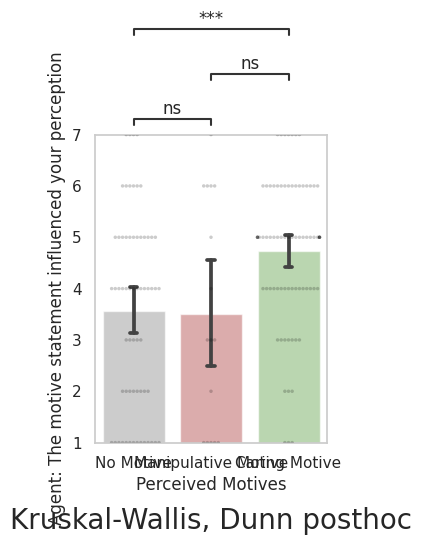

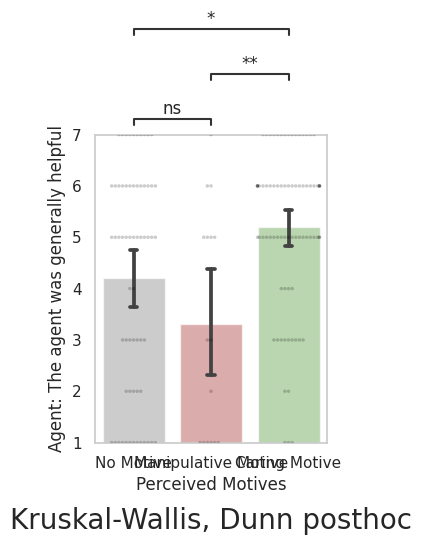

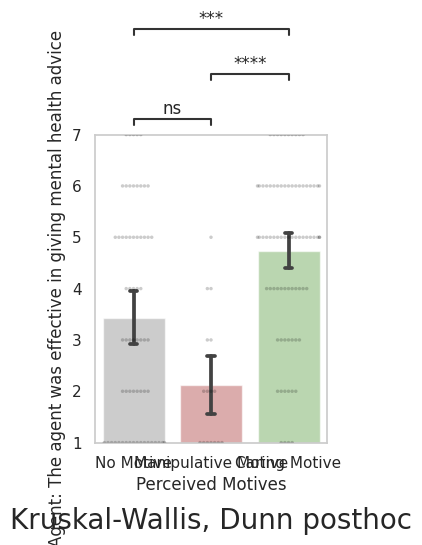

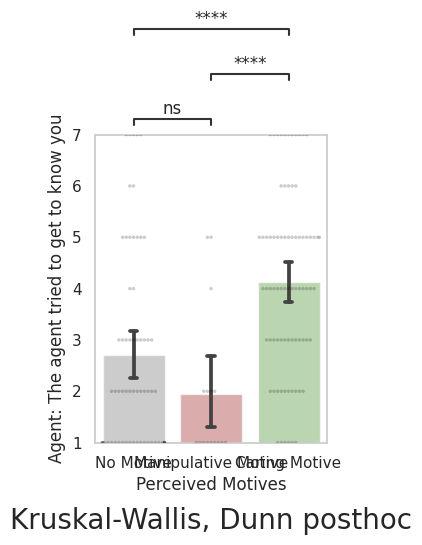

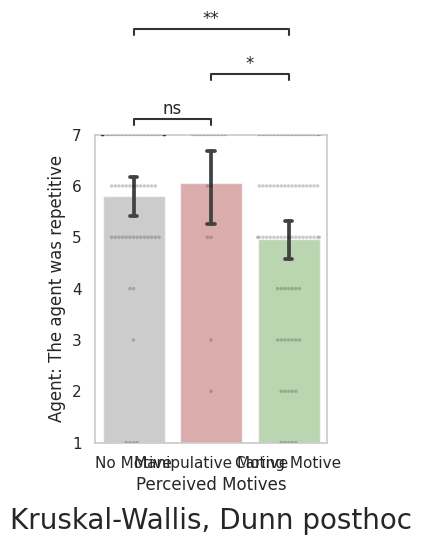

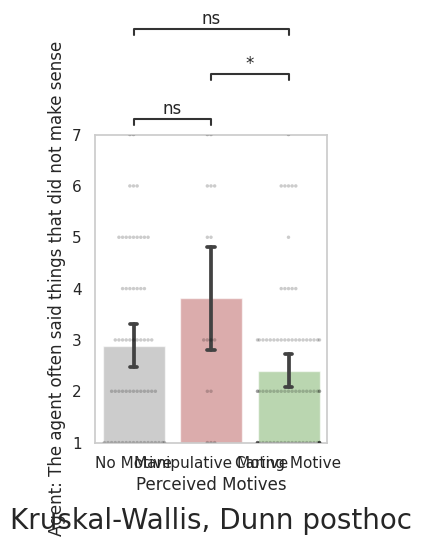

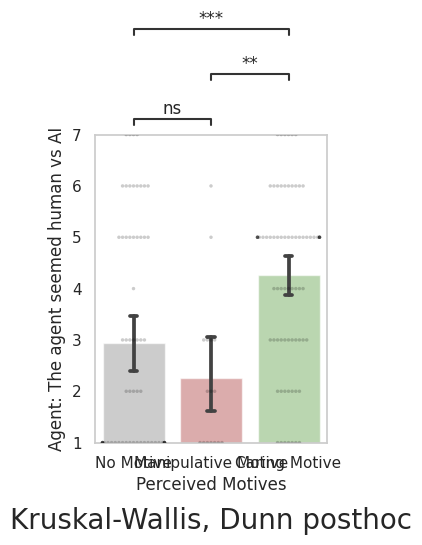

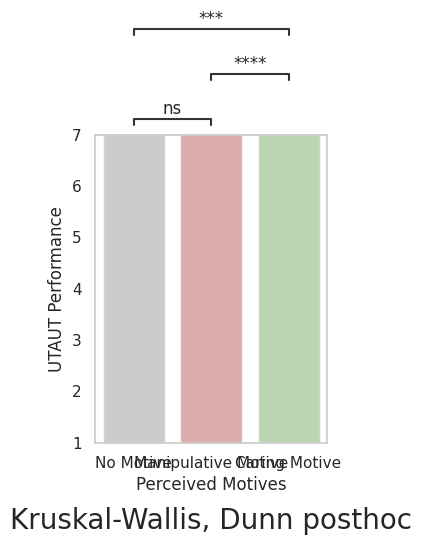

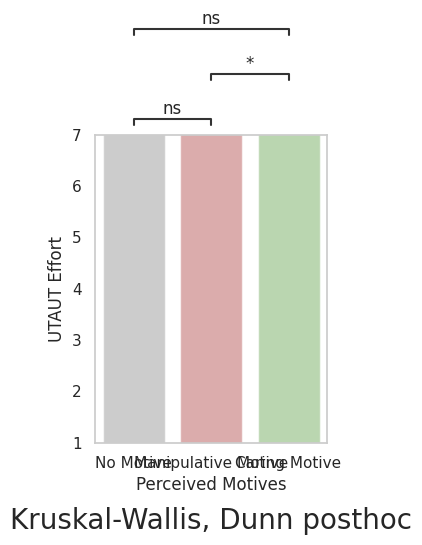

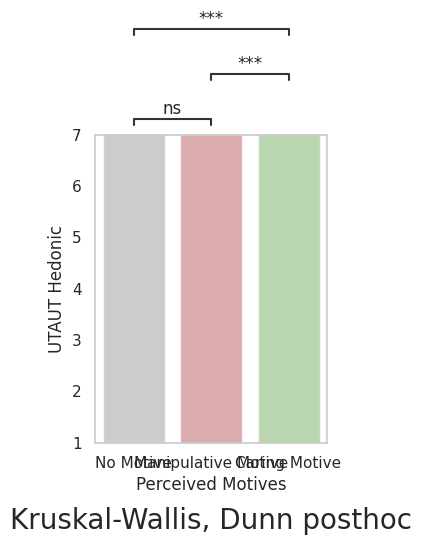

In [13]:
# ELIZA - Perceived

for i in vizlist_lik:
    dvar = df.columns[i]
    print("**********************************")
    print(dvar)
    stat_process.StatTest(df, "Perceived Motives", dvar, conditions_list, viz=True, pal=my_pal, ylims=(1,7))

**********************************
Agent: You would recommend this agent for your friend
[StatTest] Minimal Sample Size was not met. Proceed to check Normality Assumption.
---------------------------------------------
Performing Shapiro-Wilk normality test...
alpha_value: 0.05
ShapiroResult(statistic=0.8495832681655884, pvalue=1.8589397541290964e-06)
Series No Motive: is NOT normal. W:0.8495832681655884, Pvalue: 1.8589397541290964e-06
ShapiroResult(statistic=0.7251454591751099, pvalue=0.00032385587110184133)
Series Manipulative Motive: is NOT normal. W:0.7251454591751099, Pvalue: 0.00032385587110184133
ShapiroResult(statistic=0.8769992589950562, pvalue=1.8982182155014016e-06)
Series Caring Motive: is NOT normal. W:0.8769992589950562, Pvalue: 1.8982182155014016e-06
Normality Assumption Met? : False
[StatTest]  Normality Assumption was not met. Proceed with Kruskal-Wallis Test
---------------------------------------------
alpha: 0.05
KruskalResult(statistic=22.007063410466486, pvalue=1.6

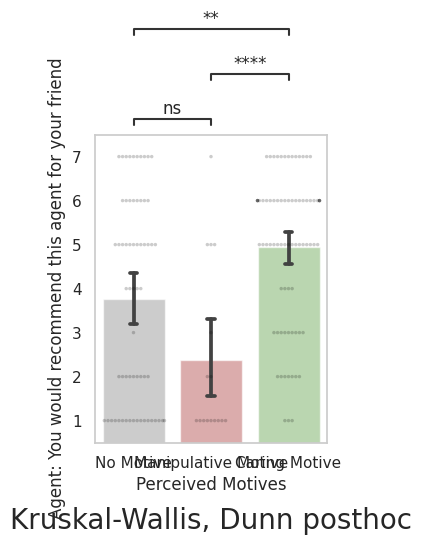

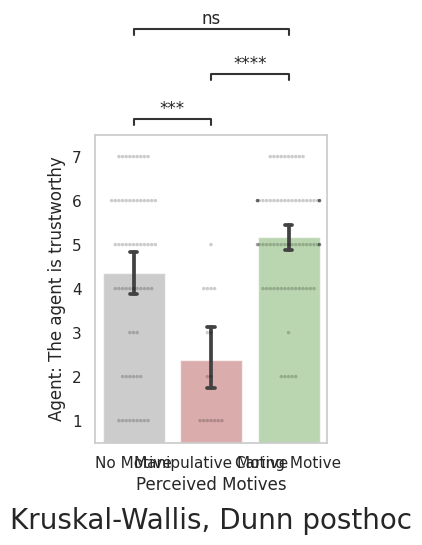

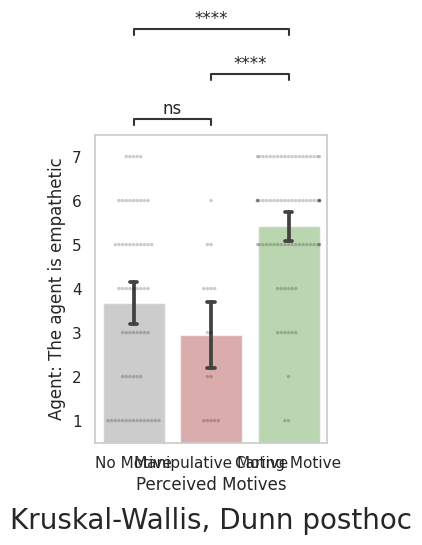

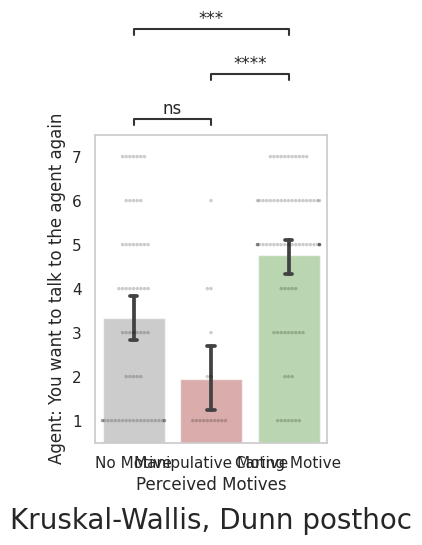

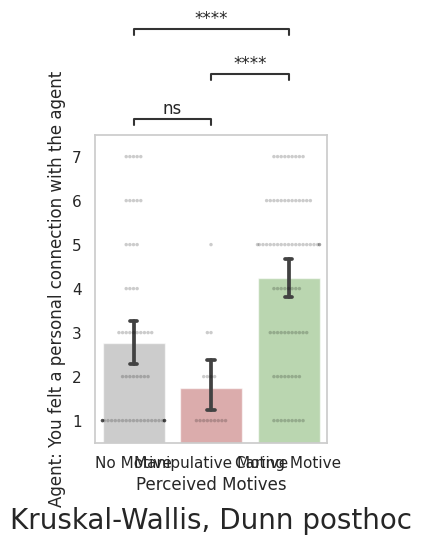

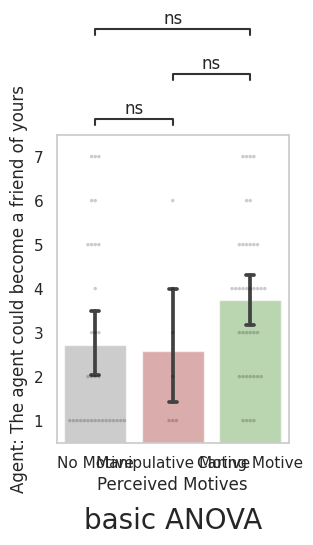

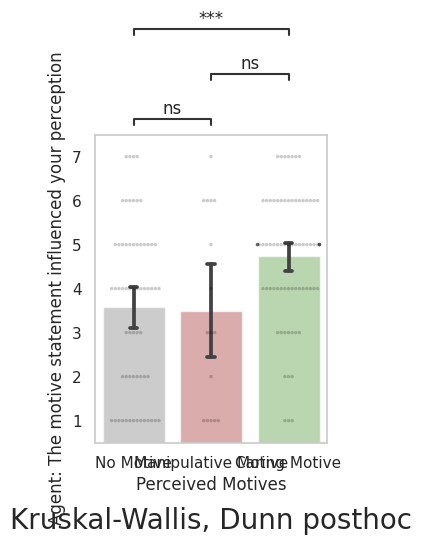

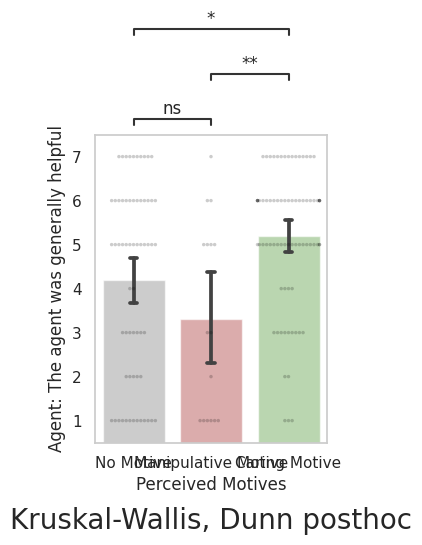

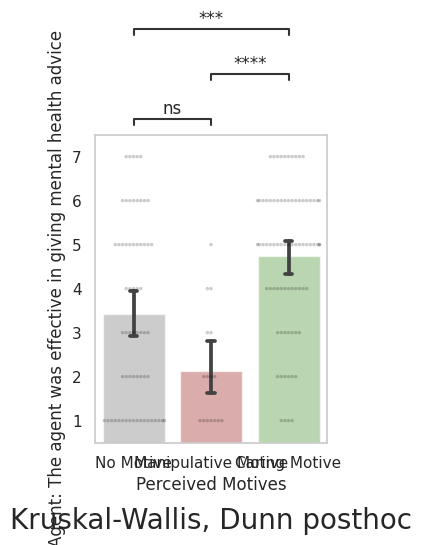

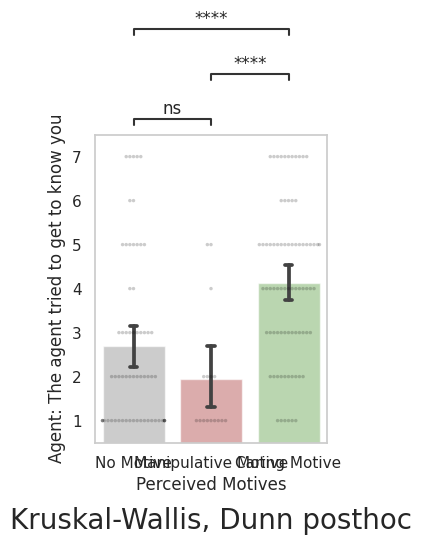

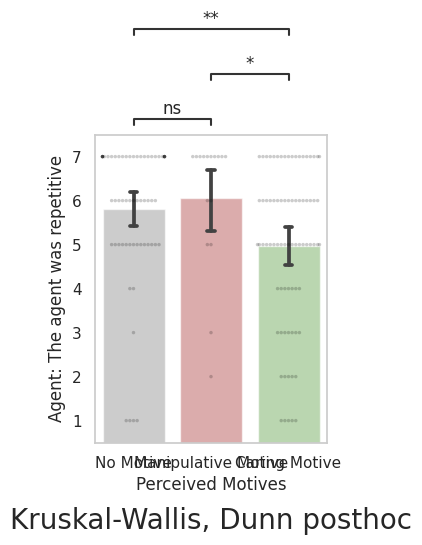

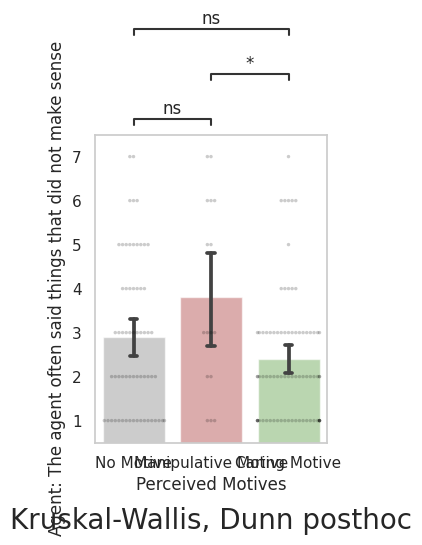

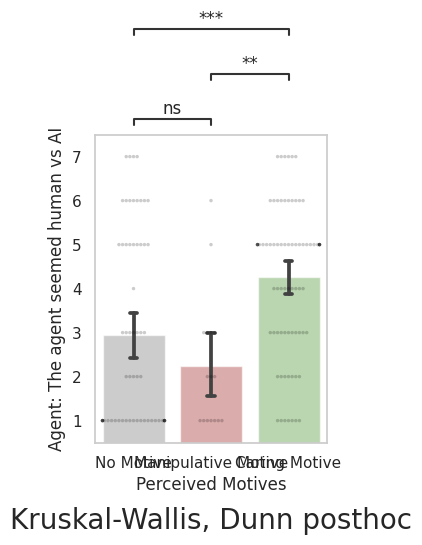

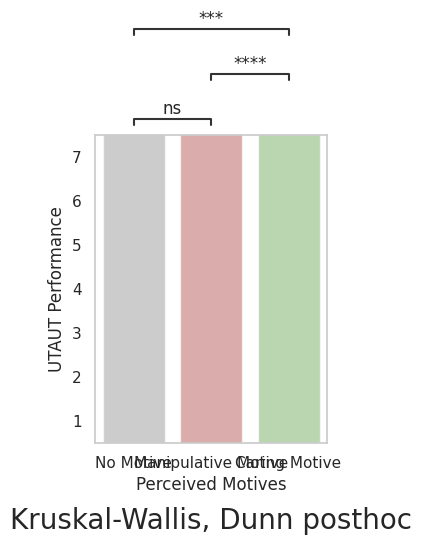

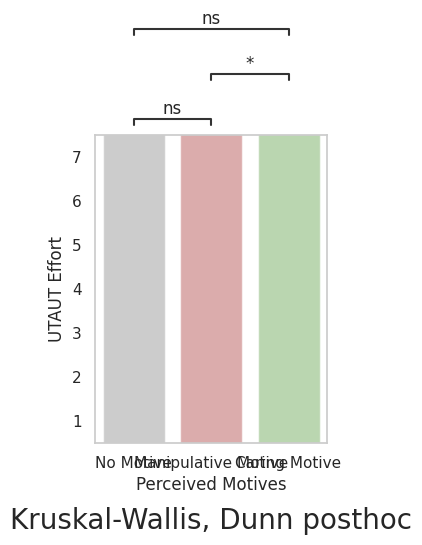

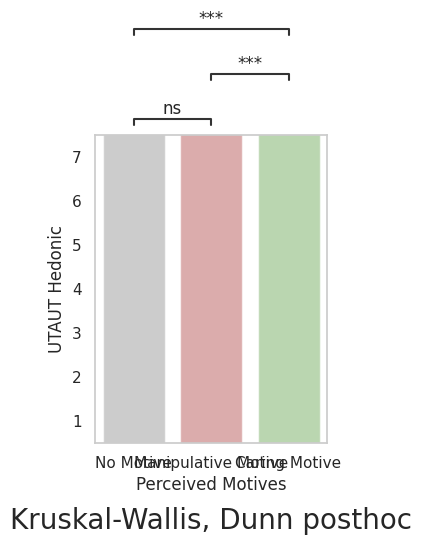

In [14]:
# ELIZA - Perceived

for i in vizlist_lik:
    dvar = df.columns[i]
    print("**********************************")
    print(dvar)
    stat_process.StatTest(df, "Perceived Motives", dvar, conditions_list, viz=True, pal=my_pal, ylims=(0.5,7.5))

[StatTest] Minimal Sample Size was met. Check if sample sizes are roughly equal.
---------------------------------------------
Performing Equal Variances Test...
Performing Levene Test...
homogeneity test: LeveneResult(statistic=0.8654949266722646, pvalue=0.422841240036515)
The populations have equal variances.
[StatTest] Assumption of Equal Variances was met. Run basic ANOVA.
---------------------------------------------
Performing ANOVA
F_onewayResult(statistic=0.986229424061674, pvalue=0.3752789677677496)
oneway ANOVA: no significance. No significant difference between means of the groups.
[StatTest] Tukey found NO statistically significance found between groups.
---------------------------------------------
Performing Tukey Post-Hoc Test...
             Multiple Comparison of Means - Tukey HSD, FWER=0.05             
       group1              group2       meandiff p-adj   lower  upper  reject
-----------------------------------------------------------------------------
      Carin

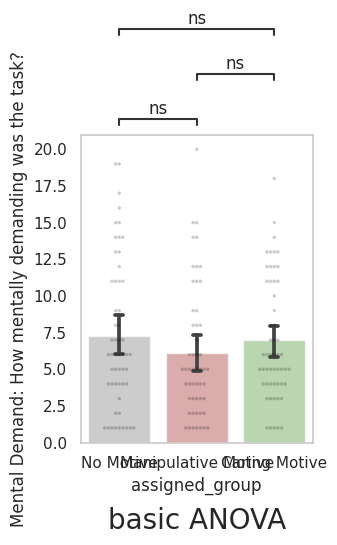

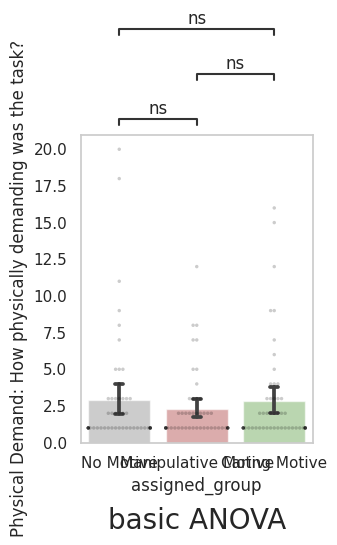

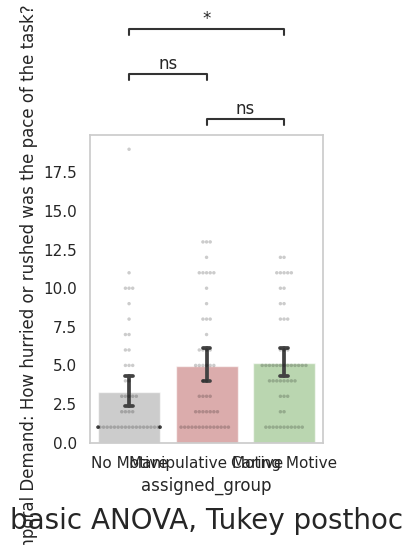

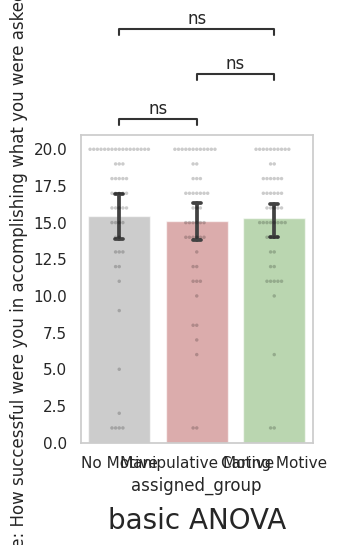

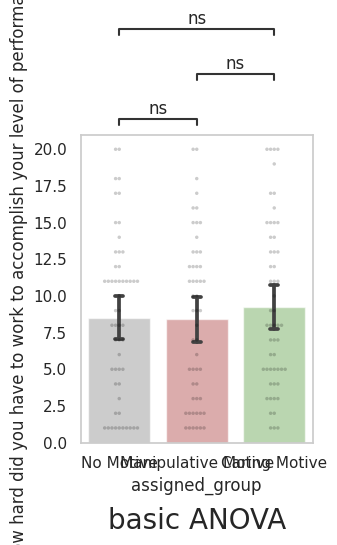

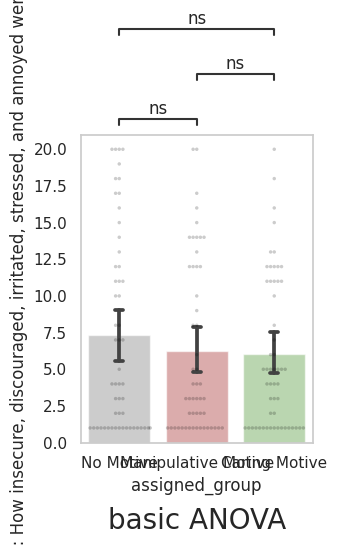

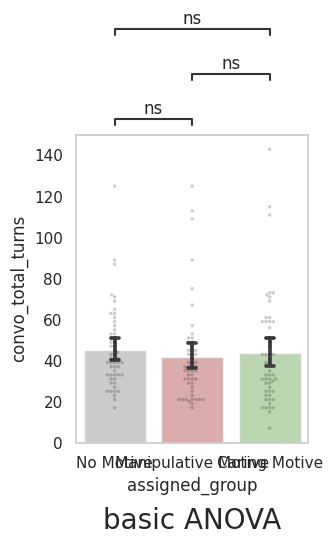

In [15]:
for i in vizlist_other:
    dvar = df.columns[i]
    stat_process.StatTest(df, ivar, dvar, conditions_list, viz=True, pal=my_pal)

In [29]:
df_e = pd.read_csv("/work/Results/Processed/GPT_Processed_Data.csv")


In [30]:
# get list of questions to vizualize
start = df_e.columns.get_loc("Agent: You would recommend this agent for your friend")
end = start + 13
tli_s = df_e.columns.get_loc("Mental Demand: How mentally demanding was the task?")
tli_e = tli_s + 6
utaut = [df_e.columns.get_loc("UTAUT Performance"),
         df_e.columns.get_loc("UTAUT Effort"),
         df_e.columns.get_loc("UTAUT Hedonic")]
other = [df_e.columns.get_loc("convo_total_turns")]
vizlist_tli_e = list(range(tli_s,tli_e))
vizlist_e = list(range(start,end)) + vizlist_tli_e + utaut + other

vizlist_lik_e = list(range(start,end)) + utaut
vizlist_other_e = list(range(tli_s,tli_e)) + other
vizlist_e

[39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 63,
 64,
 65,
 66,
 67,
 68,
 92,
 93,
 94,
 90]

[StatTest] Minimal Sample Size was met. Check if sample sizes are roughly equal.
---------------------------------------------
Performing Equal Variances Test...
Performing Levene Test...
homogeneity test: LeveneResult(statistic=5.510821438764715, pvalue=0.004863539061412032)
The populations do NOT have equal variances.
[StatTest] Assumption of Equal Variances was violated. Run ANOVA with Welch Statistic.
F_onewayResult(statistic=4.33612721629483, pvalue=0.015567166863270372)
ANOVA with Welch Statistic: SIGNIFICANCE. At least one of the means of the groups is different.
[StatTest] ANOVA with Welch Statistic found significance. Run Tukey post-hoc test.
---------------------------------------------
Performing Tukey Post-Hoc Test...
             Multiple Comparison of Means - Tukey HSD, FWER=0.05              
       group1              group2       meandiff p-adj   lower   upper  reject
------------------------------------------------------------------------------
      Caring Motive Man

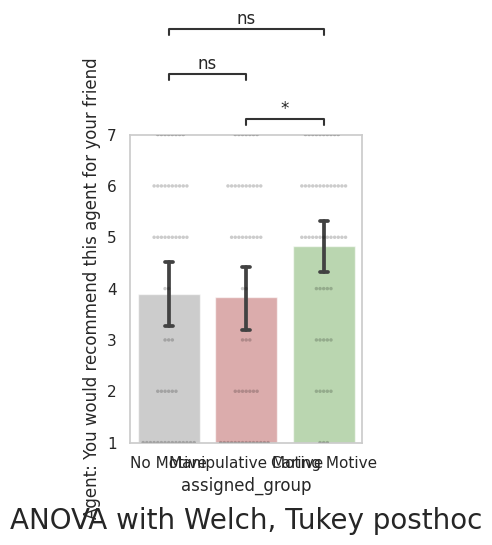

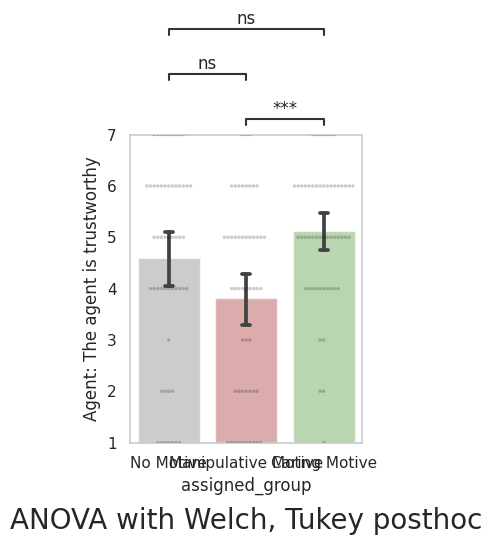

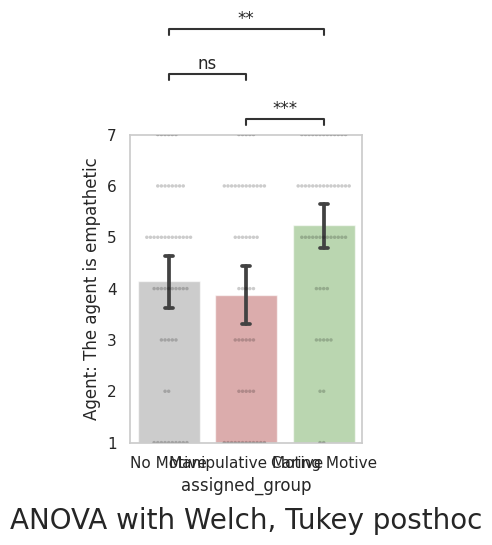

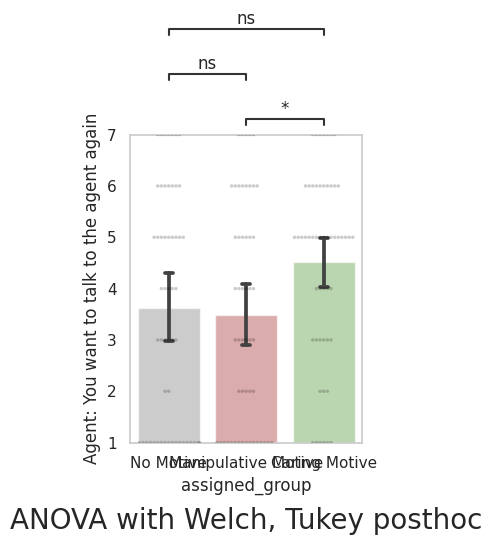

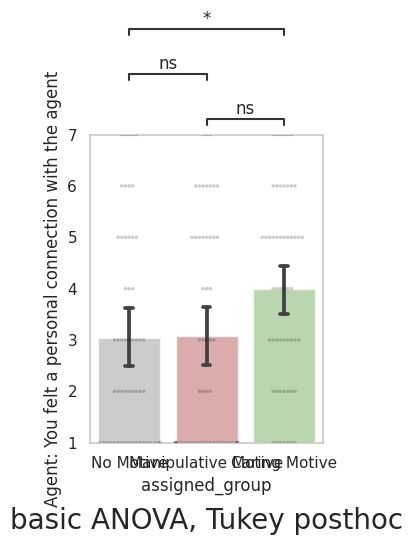

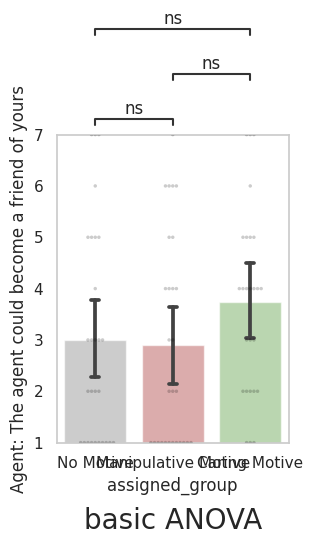

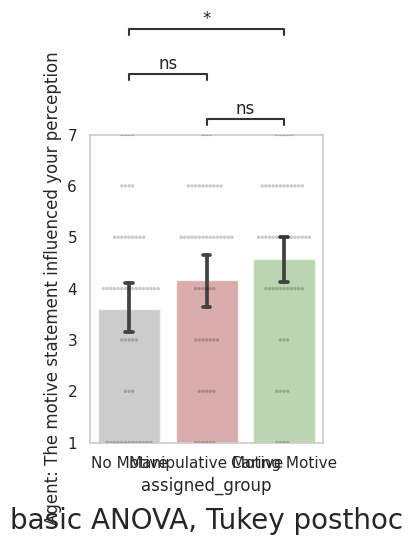

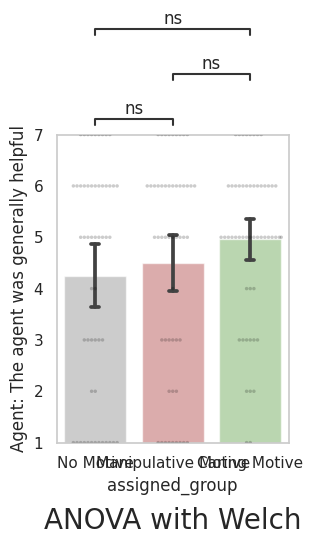

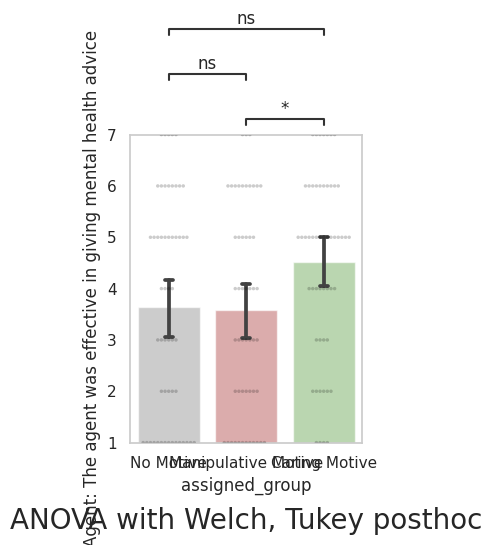

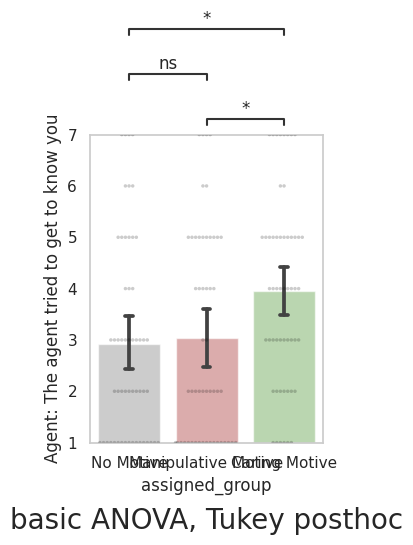

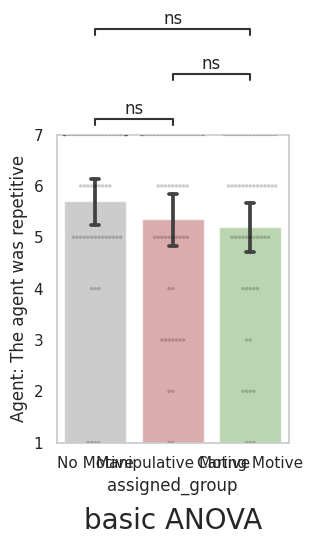

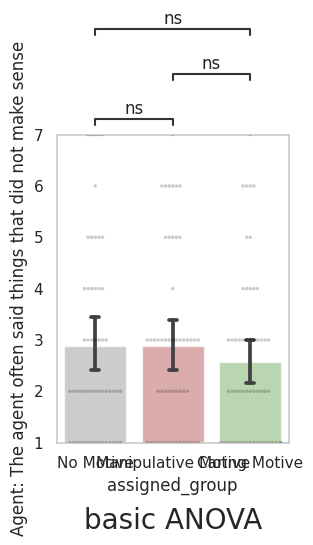

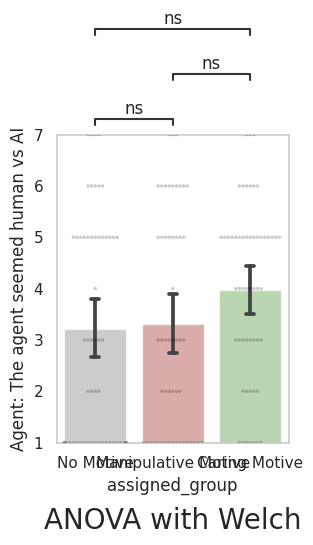

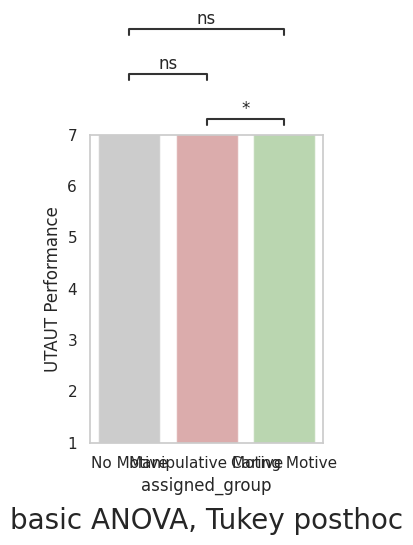

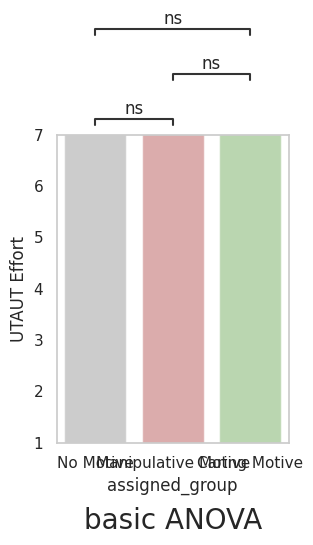

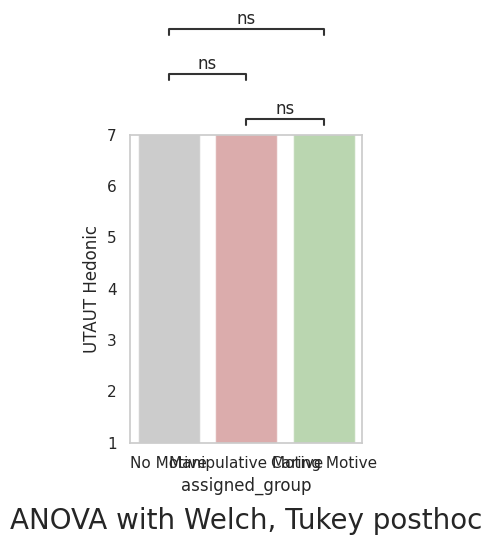

In [31]:
for i in vizlist_lik_e:
    dvar = df_e.columns[i]
    stat_process.StatTest(df_e, ivar, dvar, conditions_list, viz=True, pal=my_pal, ylims=(1,7))

[StatTest] Minimal Sample Size was not met. Proceed to check Normality Assumption.
---------------------------------------------
Performing Shapiro-Wilk normality test...
alpha_value: 0.05
ShapiroResult(statistic=0.8495832681655884, pvalue=1.8589397541290964e-06)
Series No Motive: is NOT normal. W:0.8495832681655884, Pvalue: 1.8589397541290964e-06
ShapiroResult(statistic=0.7251454591751099, pvalue=0.00032385587110184133)
Series Manipulative Motive: is NOT normal. W:0.7251454591751099, Pvalue: 0.00032385587110184133
ShapiroResult(statistic=0.8769992589950562, pvalue=1.8982182155014016e-06)
Series Caring Motive: is NOT normal. W:0.8769992589950562, Pvalue: 1.8982182155014016e-06
Normality Assumption Met? : False
[StatTest]  Normality Assumption was not met. Proceed with Kruskal-Wallis Test
---------------------------------------------
alpha: 0.05
KruskalResult(statistic=22.007063410466486, pvalue=1.6642819343319887e-05)
Significant Result for Kruskal Wallis.
Compute the DUNN post-hoc tes

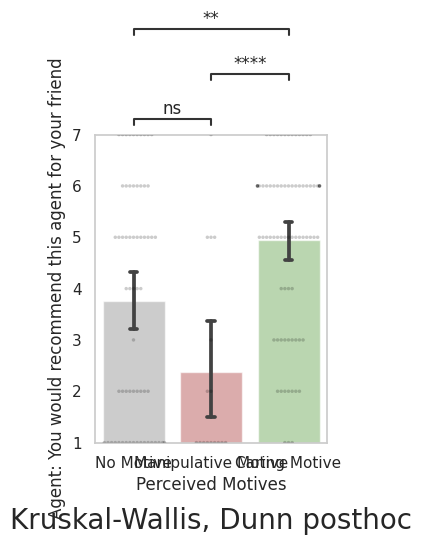

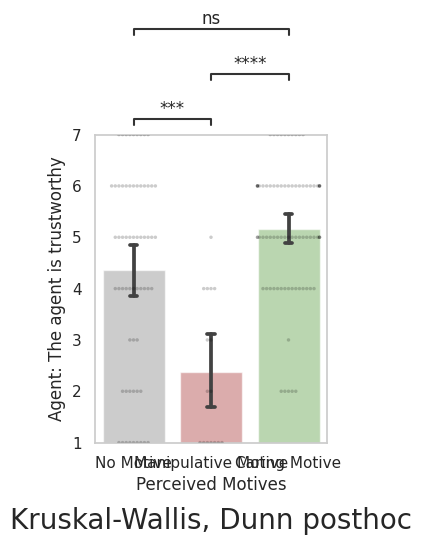

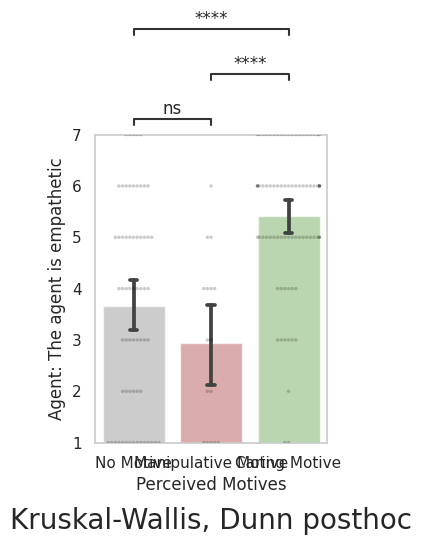

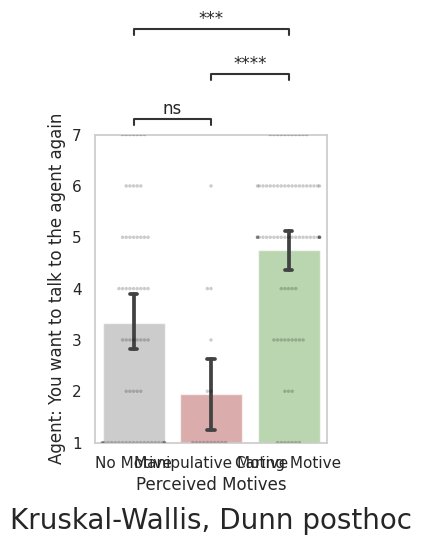

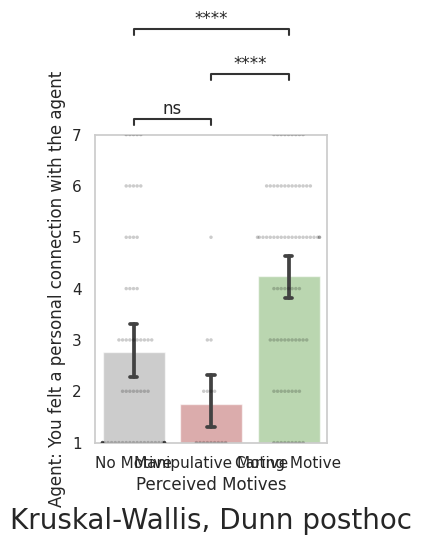

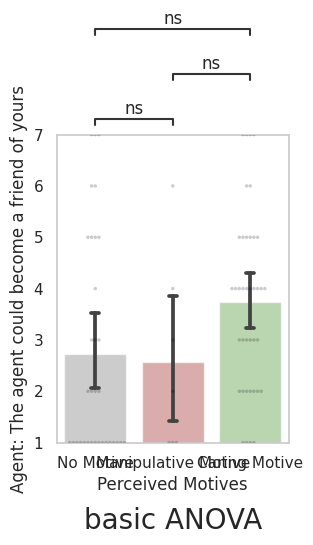

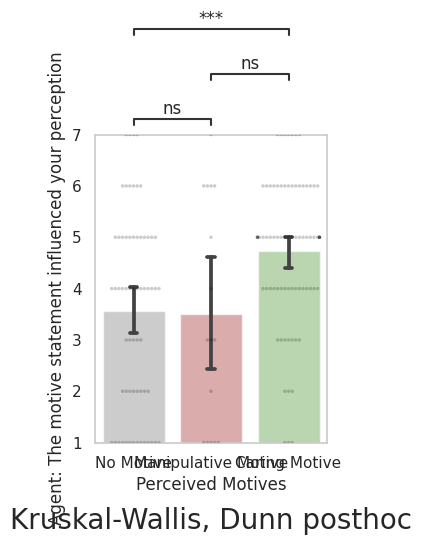

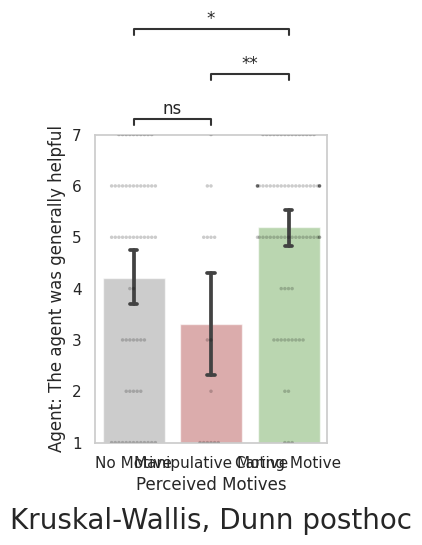

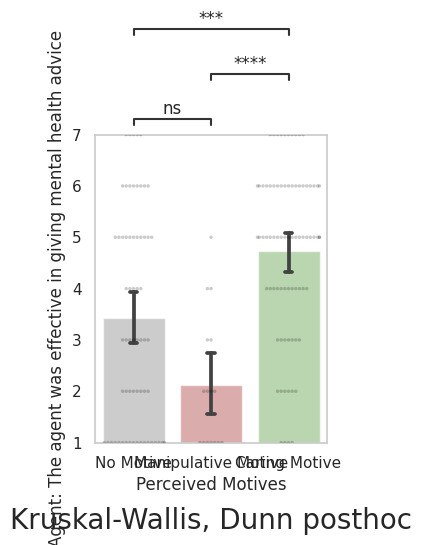

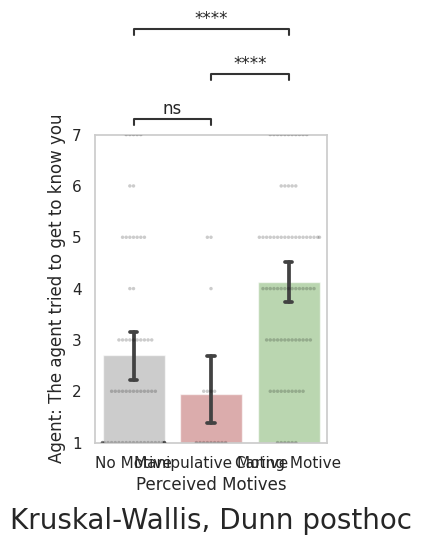

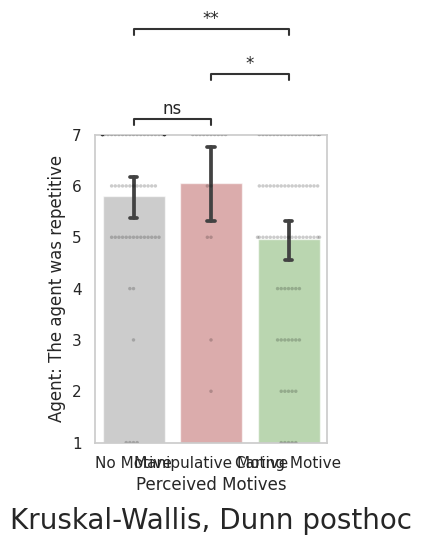

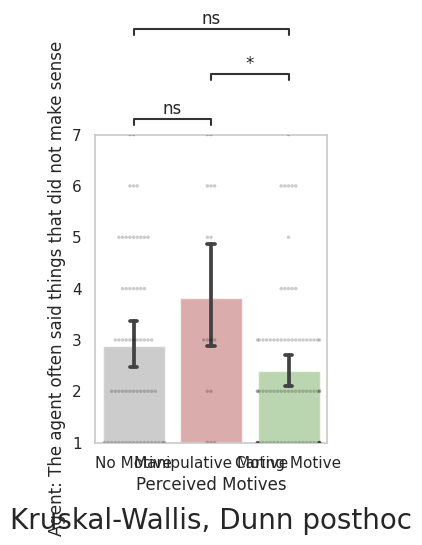

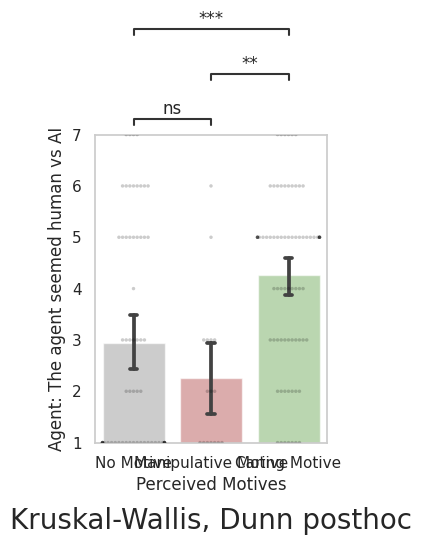

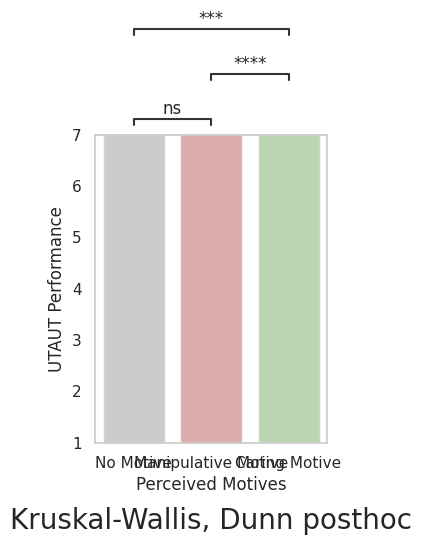

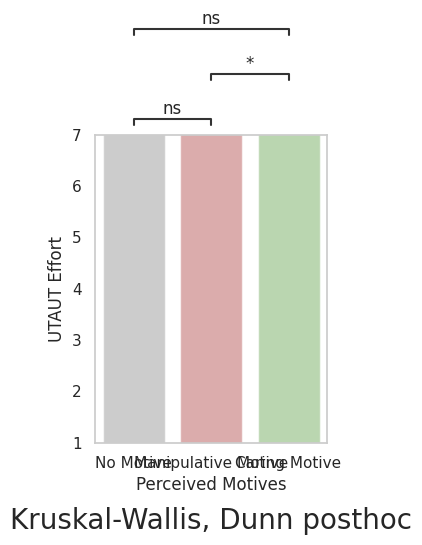

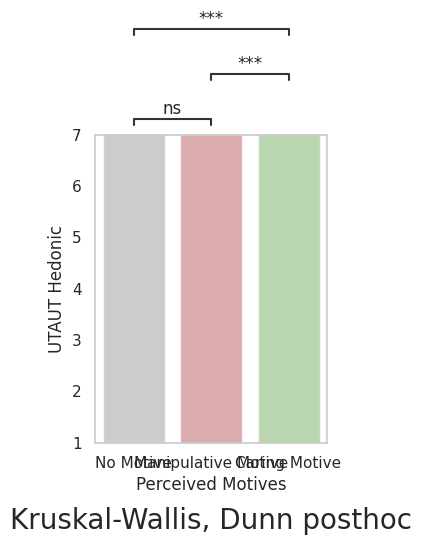

In [32]:
for i in vizlist_lik_e:
    dvar = df_e.columns[i]
    stat_process.StatTest(df_e, "Perceived Motives", dvar, conditions_list, viz=True, pal=my_pal, ylims=(1,7))

In [34]:
df['assigned_group'].value_counts()

Caring Motive          54
No Motive              54
Manipulative Motive    52
Name: assigned_group, dtype: int64

In [42]:
df[df['assigned_group'] == 'No Motive']['Perceived Motives'].value_counts()

No Motive              42
Caring Motive           8
Manipulative Motive     3
Name: Perceived Motives, dtype: int64

In [41]:
df[df['assigned_group'] == 'Caring Motive']['Perceived Motives'].value_counts()

Caring Motive          48
No Motive               5
Manipulative Motive     1
Name: Perceived Motives, dtype: int64

In [36]:
df[df['assigned_group'] == 'Manipulative Motive']['Perceived Motives'].value_counts()

Caring Motive          22
No Motive              16
Manipulative Motive    12
Name: Perceived Motives, dtype: int64

In [48]:
groupmap = {'None' : [42, 8, 3], 'Caring' : [5, 48, 1], 'Manipulative': [16, 22, 12]}
df_gmap = pd.DataFrame(groupmap)
df_gmap.index = ['None', 'Caring', 'Manipulative']
df_gmap

None  Caring  Manipulative
None            42       5            16
Caring           8      48            22
Manipulative     3       1            12

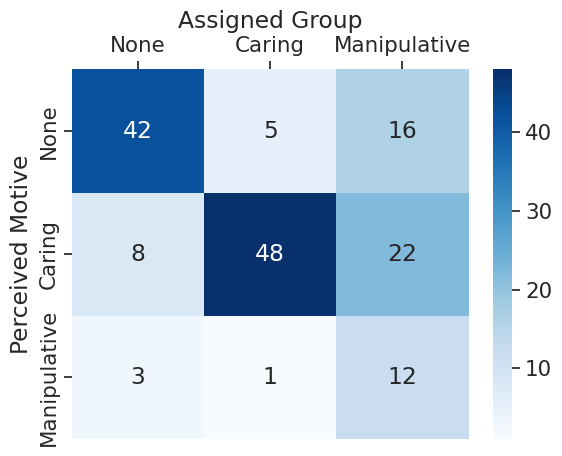

In [49]:
sns.set(font_scale=1.4)
ax = sns.heatmap(df_gmap, cmap="Blues", annot=True)
ax.set(title='Assigned Group', ylabel='Perceived Motive')
ax.tick_params(top=True, left=True, labeltop=True, bottom=False, labelbottom=False)


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1f3ea62d-9e62-461e-8c65-1caf654509ee' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>